# Advanced Regression - Assignment

## House Price Prediction

#### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# To display all columns
pd.pandas.set_option('display.max_columns', None)

## Step 1: Reading and Understanding the Data

In [4]:
#Loading the data from csv file

housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking the shape of the dataset
housing_data.shape

(1460, 81)

In [6]:
# Checking the column wise info of the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking the numerical columns statistically
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Displaying the columns of data
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Displaying the first 5 rows
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Data Preparation and Feature Engineering

In [10]:
# checking duplicates

# Dropping duplicate values in dataset, if exist
housing_data = housing_data.drop_duplicates()
print(f'\nShape of dataframe:\n{housing_data.shape}')
housing_data.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Changing the number of rows to be displayed
pd.set_option('display.max_rows', None)

In [12]:
# Checking size of our data
housing_data.shape

(1460, 81)

#### Removing ID column as it won't be needed for further analysis

In [13]:
# Dropping column Id
housing_data.drop(['Id'],axis=1, inplace=True)

In [14]:
# Checking Missing values along all columns
round(100*housing_data.isnull().sum()/len(housing_data.index),4).sort_values(ascending=False)

PoolQC           99.5205
MiscFeature      96.3014
Alley            93.7671
Fence            80.7534
FireplaceQu      47.2603
LotFrontage      17.7397
GarageType        5.5479
GarageCond        5.5479
GarageFinish      5.5479
GarageQual        5.5479
GarageYrBlt       5.5479
BsmtFinType2      2.6027
BsmtExposure      2.6027
BsmtQual          2.5342
BsmtCond          2.5342
BsmtFinType1      2.5342
MasVnrArea        0.5479
MasVnrType        0.5479
Electrical        0.0685
RoofMatl          0.0000
Exterior1st       0.0000
RoofStyle         0.0000
ExterQual         0.0000
Exterior2nd       0.0000
YearBuilt         0.0000
ExterCond         0.0000
Foundation        0.0000
YearRemodAdd      0.0000
SalePrice         0.0000
OverallCond       0.0000
OverallQual       0.0000
HouseStyle        0.0000
BldgType          0.0000
Condition2        0.0000
Condition1        0.0000
Neighborhood      0.0000
LandSlope         0.0000
LotConfig         0.0000
Utilities         0.0000
LandContour       0.0000


In [15]:
# Columns with missing values
round(100*housing_data.isnull().sum()[housing_data.isnull().sum()>0]/len(housing_data.index),4).sort_values(ascending=False)

PoolQC          99.5205
MiscFeature     96.3014
Alley           93.7671
Fence           80.7534
FireplaceQu     47.2603
LotFrontage     17.7397
GarageYrBlt      5.5479
GarageType       5.5479
GarageFinish     5.5479
GarageQual       5.5479
GarageCond       5.5479
BsmtFinType2     2.6027
BsmtExposure     2.6027
BsmtFinType1     2.5342
BsmtCond         2.5342
BsmtQual         2.5342
MasVnrArea       0.5479
MasVnrType       0.5479
Electrical       0.0685
dtype: float64

### 2.1 Treatment of missing values

#### Meaning of NA/NaN values in above columns according to data dictionary:
As per the dictionary most of above columns have reason behind the missing/ NA values such as unavailability of Garage / Basement in the house.
- PoolQC : NA No Pool
- MiscFeature : NA None
- Alley : NA No alley access
- Fence : NA No Fence
- FireplaceQu : NA No Fireplace
- LotFrontage : Values missing
- GarageYrBlt, GarageType, GarageFinish, GarageQual, GarageCond : NA No Garage
- BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual : NA No Basement
- MasVnrArea : Values missing
- MasVnrType : None None (Same as Mode of this column)
- Electrical : Values missing

Only MasVnrArea, LotFrontage and Electrical are the 3 columns which will be treated using mean/mode/median method. Rest of the columns with missing values will be treated according to data dictionary as 'Unavailable'.

For columns GarageYrBlt, let's keep NA values as it is, we'll deal with it after feature engineering. Treating this column with mean/median will be misleading

### Treating missing values of categorical columns

In [16]:
# Storing the names of the columns having some meaning to missing data
treat_NA = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

In [17]:
# Replacing Missing values as Unavailable based of availability of facility

for i in treat_NA:
    print('Replacement value for {}: '.format(i), 'Unavailable')
    housing_data[i] = housing_data[i].replace(np.nan, 'Unavailable')
    
# Treating missing values of below categorical columns with Mode value

print('Mode value for MasVnrType: ', housing_data['MasVnrType'].mode()[0])
housing_data['MasVnrType'] = housing_data['MasVnrType'].replace(np.nan, housing_data['MasVnrType'].mode()[0])

print('Mode value for Electrical: ', housing_data['Electrical'].mode()[0])
housing_data['Electrical'] = housing_data['Electrical'].replace(np.nan, housing_data['Electrical'].mode()[0])

Replacement value for PoolQC:  Unavailable
Replacement value for MiscFeature:  Unavailable
Replacement value for Alley:  Unavailable
Replacement value for Fence:  Unavailable
Replacement value for FireplaceQu:  Unavailable
Replacement value for GarageType:  Unavailable
Replacement value for GarageFinish:  Unavailable
Replacement value for GarageQual:  Unavailable
Replacement value for GarageCond:  Unavailable
Replacement value for BsmtFinType2:  Unavailable
Replacement value for BsmtExposure:  Unavailable
Replacement value for BsmtFinType1:  Unavailable
Replacement value for BsmtCond:  Unavailable
Replacement value for BsmtQual:  Unavailable
Mode value for MasVnrType:  None
Mode value for Electrical:  SBrkr


### Treating missing values of numeric columns

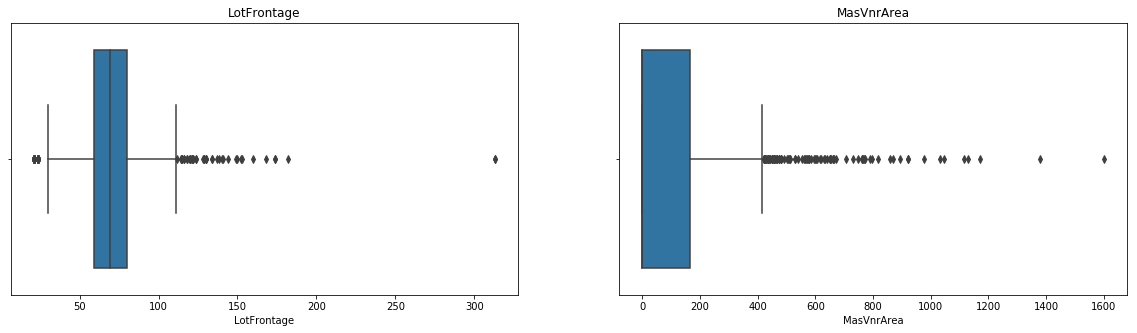

In [18]:
# Let's visualize the columns first to see presence of outliers
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.boxplot(housing_data['LotFrontage'])
plt.title('LotFrontage')


plt.subplot(1,2,2)
sns.boxplot(housing_data['MasVnrArea'])
plt.title('MasVnrArea')

plt.show()

#### As we can see columns LotFrontage and MasVnrArea has some outliers present. Hence, we'll replace their missing values with median value. 

In [19]:
# Treating missing values with median of respective column
print('Median value for LotFrontage: ', housing_data['LotFrontage'].median())
housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())

print('Median value for MasVnrArea: ', housing_data['MasVnrArea'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())

Median value for LotFrontage:  69.0
Median value for MasVnrArea:  0.0


In [20]:
# Checking Missing values along for above columns again
round(100*housing_data.isnull().sum()[housing_data.isnull().sum()>0]/len(housing_data.index),4).sort_values(ascending=False)

GarageYrBlt    5.5479
dtype: float64

Missing values of GarageYrBlt column will be treated after feature engineering step as Treating this column with mean/median will indicate presence of Garage facility which is not true and can be be misleading. 

In [21]:
# Checking the shape of the dataset
housing_data.shape

(1460, 80)

In [22]:
# Displaying the columns of data
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 2.2 Feature engineering and mapping of variable to appropriate datatype

In [23]:
# Storing numerical column names in a list
num_col = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
print(num_col)
len(num_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


37

In [24]:
# Checking number of unique values in numerical columns
for column in num_col:
    print(column,':',housing_data[column].nunique())
    print(housing_data[column].value_counts())
    print('___________________________________________________')

MSSubClass : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
___________________________________________________
LotFrontage : 110
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
68.0      19
24.0      19
64.0      19
73.0      18
63.0      17
55.0      17
79.0      17
72.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
40.0      12
71.0      12
43.0      12
67.0      12
82.0      12
57.0      12
76.0      11
34.0      10
53.0      10
88.0      10
86.0      10
92.0      10
44.0       9
62.0       9
84.0       9
77.0       9
35.0       9
96.0       8
98.0       8
61.0       8
93.0       8
120.0      7
107.0      7
95.0       7
58.0       7
41.0       6
30.0       6
105.0      6
94.0       6
54.0       6
91.

TotRmsAbvGrd : 12
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
___________________________________________________
Fireplaces : 4
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
___________________________________________________
GarageYrBlt : 97
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
19

#### Transforming some numerical variables that are really categorical

In [25]:
#converting from int type to object to treat the variables as categorical variables
housing_data['MSSubClass'] = housing_data['MSSubClass'].astype('object')
housing_data['YrSold'] = housing_data['YrSold'].astype('object')

#### Deriving new features

In [26]:
# Deriving Age features from (YearBuilt, YearRemodAdd, GarageYrBlt) to (Age_Built, Age_RemodAdd, Age_Garage) w.r.t. current year
housing_data['Age_Built'] = pd.datetime.now().year - housing_data['YearBuilt']  
housing_data['Age_RemodAdd'] = pd.datetime.now().year - housing_data['YearRemodAdd']  
housing_data['Age_Garage'] = pd.datetime.now().year - housing_data['GarageYrBlt']                 

In [27]:
# Removing original Year columns from data
housing_data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],axis=1, inplace=True)

In [28]:
# Checking Columns with Missing values again
round(100*housing_data.isnull().sum()[housing_data.isnull().sum()>0]/len(housing_data.index),4).sort_values(ascending=False)

Age_Garage    5.5479
dtype: float64

In [29]:
# Only Age_Garage has missing values which we did not treat earlier.
# As the Garage is not available for those houses age value for the same will be 0
housing_data['Age_Garage'] = housing_data['Age_Garage'].replace(np.nan, int(0))

In [30]:
# Changing the datatype of Age columns
housing_data['Age_Garage'] = housing_data['Age_Garage'].astype('int64')

In [31]:
# Checking the values in derived columns
housing_data[['Age_Built','Age_RemodAdd','Age_Garage','YrSold']].head()

,Age_Built,Age_RemodAdd,Age_Garage,YrSold
0,18,18,18,2008
1,45,45,45,2007
2,20,19,20,2008
3,106,51,23,2006
4,21,21,21,2008


In [32]:
# Converting Column MoSold to Categorical based on month
def month_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

    housing_data[['MoSold']] = housing_data[['MoSold']].apply(month_map)

In [33]:
# Converting Column Overall Ratings to Categorical based on data dictionary
def Rating_map(x):
    return x.map({
        1:'Po',
        2:'Po',
        3:'Fa',
        4:'Fa',
        5:'TA',
        6:'TA',
        7:'Gd',
        8:'Gd',
        9:'Ex',
        10:'Ex'
    })

housing_data[['OverallQual']] = housing_data[['OverallQual']].apply(Rating_map)
housing_data[['OverallCond']] = housing_data[['OverallCond']].apply(Rating_map)

In [34]:
# Storing names of Categorical and numerical columns in different lists for further analysis
num_col = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
print(num_col)
print(len(num_col))

cat_col = list(housing_data.dtypes[housing_data.dtypes =='object'].index)
print(cat_col)
print(len(cat_col))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age_Built', 'Age_RemodAdd', 'Age_Garage']
32
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', '

In [35]:
housing_data.shape

(1460, 80)

### 2.3 Outlier Check for numeric columns

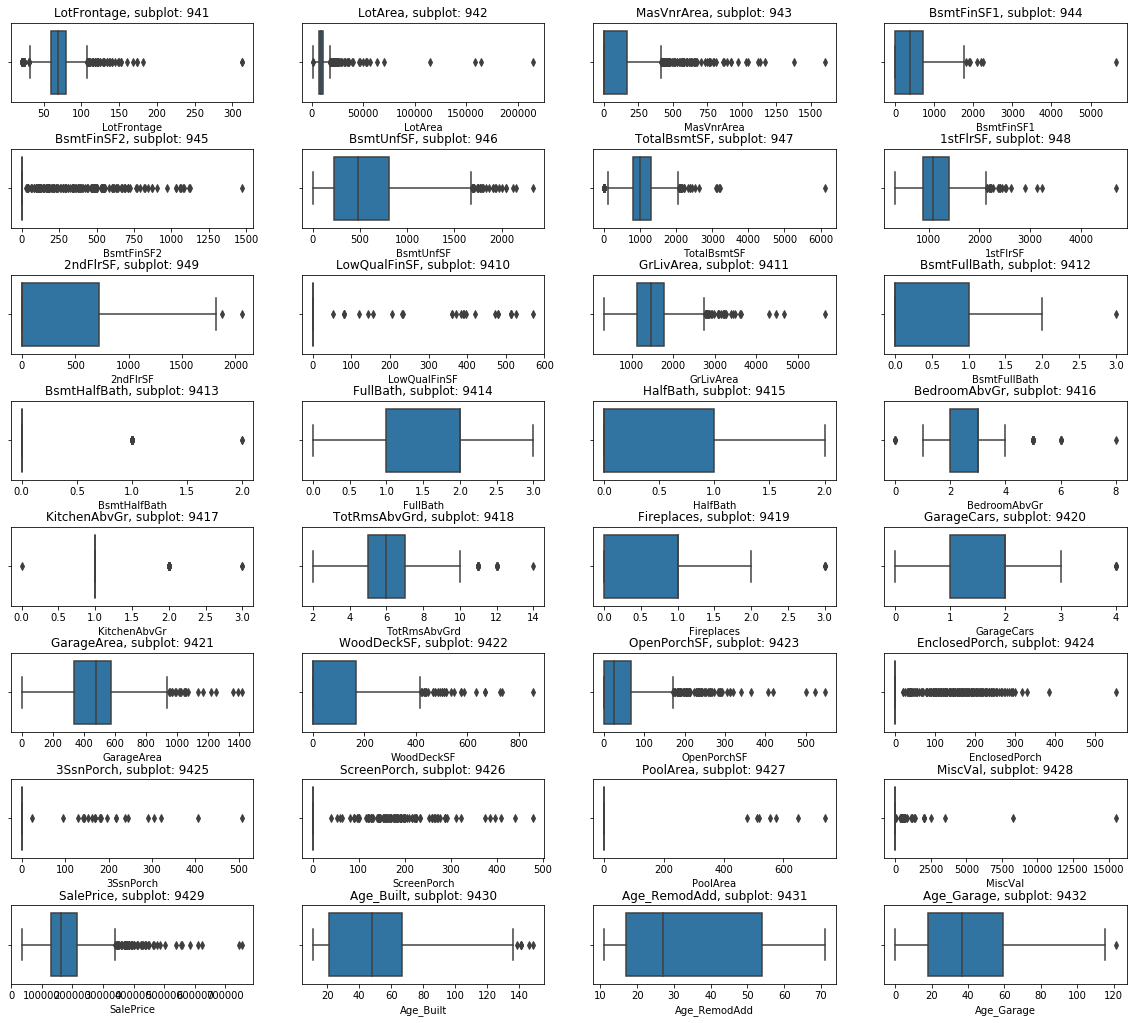

In [36]:
# Plotting Boxplots for outlier treatment

a = 9  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(housing_data[i])
    c = c + 1
    plt.subplots_adjust(hspace=0.6)
plt.show()

In [37]:
# Checking statistical parameters of numerical columns
housing_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_Built,Age_RemodAdd,Age_Garage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,49.732192,36.134247,40.136301
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.892617
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,11.000000,11.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,21.000000,17.000000,18.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,48.000000,27.000000,36.500000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,67.000000,54.000000,59.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,96.100000,71.000000,73.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,105.000000,71.000000,91.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,121.820000,71.000000,103.820000


#### Based on above boxplots and statistical description of numerical columns, we can see many of those features have outliers in them.
- But after verifying the data individually, we can see some of them are valid data points. for example, for PoolArea feature, most of the data points are 0 as that property does not have a pool. Housing property having a pool are very less in number thus this values are treated as outlier in boxplot.
- Treating such columns by IQR method or Z-score method will result in loss of these data points.
- Hence, Let's keep this data points for now. 
- During EDA step after verifying the relatonship between target variable and this columns, and after removing imbalanced features we can take a decision

In [38]:
# Checking the shape of dataset
housing_data.shape

(1460, 80)

In [39]:
# Verifying the categorical columns
cat_col = list(housing_data.dtypes[housing_data.dtypes =='object'].index)
len(cat_col)

48

In [40]:
# Checing values of individual categorical columns
for column in cat_col:
    print(column,':',housing_data[column].nunique())
    print(housing_data[column].value_counts())
    print('___________________________________________________')

MSSubClass : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
___________________________________________________
MSZoning : 5
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
___________________________________________________
Street : 2
Pave    1454
Grvl       6
Name: Street, dtype: int64
___________________________________________________
Alley : 3
Unavailable    1369
Grvl             50
Pave             41
Name: Alley, dtype: int64
___________________________________________________
LotShape : 4
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
___________________________________________________
LandContour : 4
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
___________________________________________________
Utilities : 

#### Some columns have above 99% same values, thus it does not play any part on predicting the target variable

In [41]:
# Trying to remove redundant features
def imbalaced_feature(df):
    imbalanced = []
    for i in df:
        counts = housing_data[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(housing_data) * 100 > 99:
            imbalanced.append(i)
    imbalanced = list(imbalanced)
    return imbalanced

In [42]:
# Finding highly imbalaced features
imbalaced_feature = imbalaced_feature(housing_data.columns)
imbalaced_feature

['Street', 'Utilities', 'PoolArea', 'PoolQC']

Above columns have very high imbalance in them and do not have any significant relation with the target variable. Hence,they does not play any part on predicting the target variable. We can remove these features from our analysis

In [43]:
# Removing high imbalaced columns from data
housing_data.drop(['Street', 'Utilities', 'PoolArea', 'PoolQC'],axis=1, inplace=True)

In [44]:
# Checking the shape of dataset
housing_data.shape

(1460, 76)

In [45]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 
num_col = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
print(len(num_col)) 

# CATEGORICAL COLUMNS: 
cat_col = list(housing_data.dtypes[housing_data.dtypes =='object'].index)
print(len(cat_col)) 

31
45


## Step 3: Exploratory Data Analysis

### 3.1 Univariate Analysis

### 3.1.1 Categorical Variables

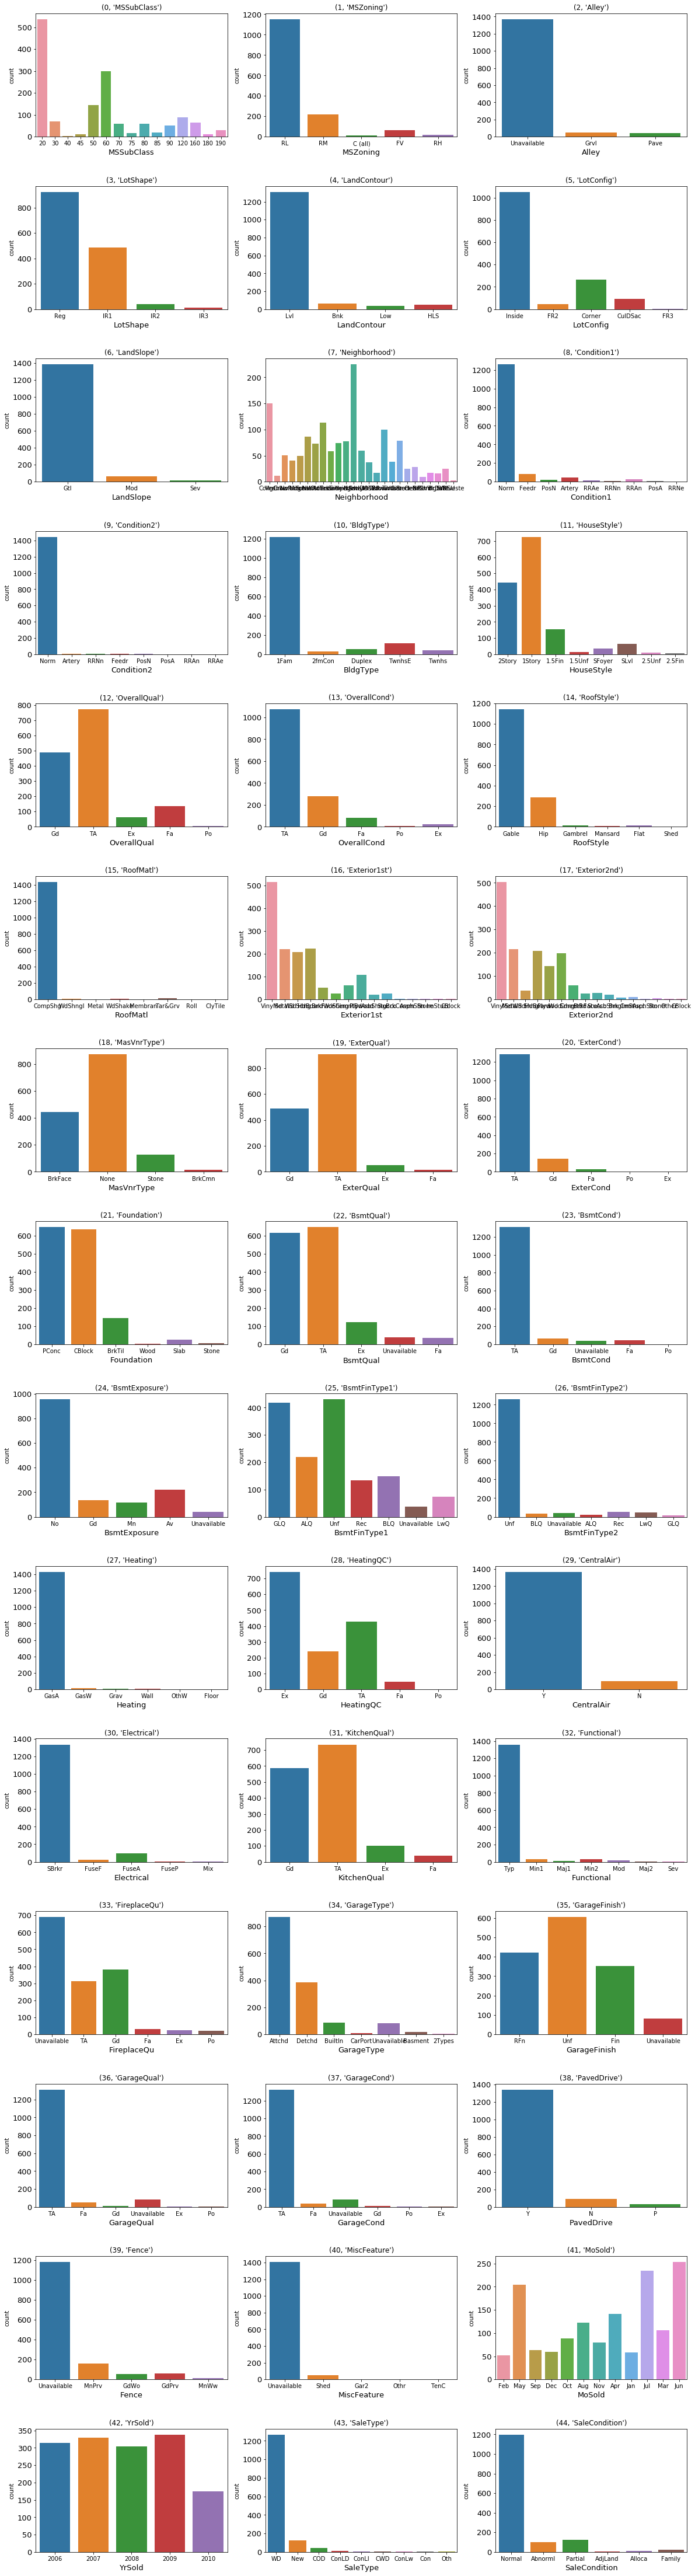

In [46]:
# Checking the categorical columns with countplots
fig = plt.figure(figsize=(20,80))

for i in enumerate(cat_col):
    plt.subplot(15, 3, i[0]+1)
    plt.title('{}'.format(i))
    plt.xlabel(i, fontsize = 13)
    plt.yticks(fontsize = 13)
    sns.countplot(data = housing_data, x=i[1])
    plt.subplots_adjust(hspace=0.4)

plt.show()

### 3.1.2 Visualization of Categorical Variable based on Converted value (Target value)

In [47]:
print(cat_col)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


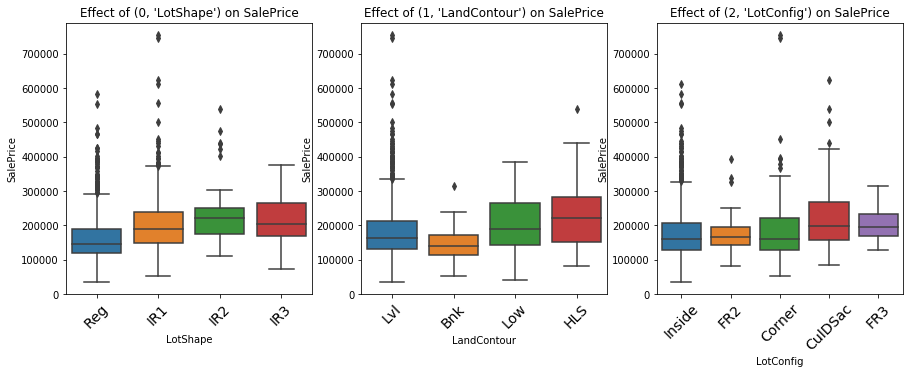

In [48]:
var = ['LotShape', 'LandContour', 'LotConfig']
fig = plt.figure(figsize=(15,5))

for i in enumerate(var):
    plt.subplot(1, 3, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14, rotation = 45)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.3)

plt.show()

Inference:
1. Sales price of Regular shaped housing properties tends to be lesser than irregular shaped houses.
2. Houses situated on hills have higher salesprice while properties having banked countour have less sales price.
3. LotConfig doesn't show any significant changes in categories, all the median values cloes to each other.

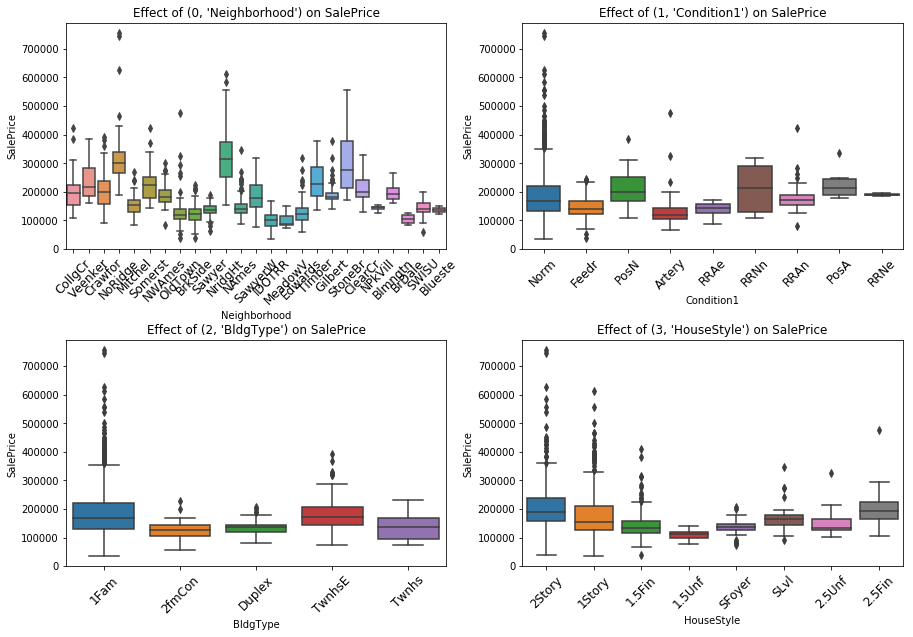

In [49]:
# Visualizing categorical features along with target variable
var = ['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle']

fig = plt.figure(figsize=(15,10))

for i in enumerate(var):
    plt.subplot(2, 2, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=12, rotation = 45)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.4) #wspace=0.4

plt.show()

Inference:
1. Sales price seems to be changing based on Neighborhood. It is high specially for Northridge, Northridge Heights and Stone Brook Neighborhood. Housing property in Old town, Brookside, Sawyer, North Ames, Iowa DOT and Rail Road, Meadow Village and Briardale neighborhoods have less sales price
2. Features condition1 and Building type doesn't give highly significant insights for sales price prediction
3. House styles like One story, Two story and Two and one-half story: 2nd level finished have high sales price. Whereas, houseing property with One and one-half story style and 2nd level unfinished has lower sales price.

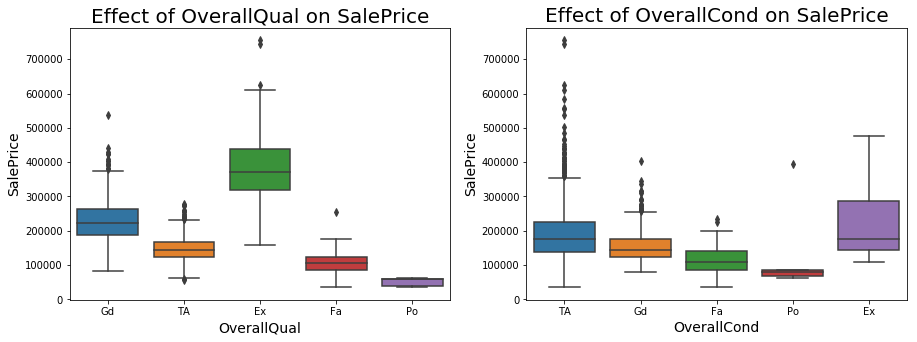

In [50]:
# Visualizing Categorical features along with target variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = housing_data, x = 'OverallQual', y = 'SalePrice')
plt.title("Effect of OverallQual on SalePrice",fontsize=20)
plt.xlabel("OverallQual", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data = housing_data, x = 'OverallCond', y = 'SalePrice')
plt.title("Effect of OverallCond on SalePrice",fontsize=20)
plt.xlabel("OverallCond", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.show()

Inference:
- Housing property with Excellent overall quality and condition does have higher sales price. 

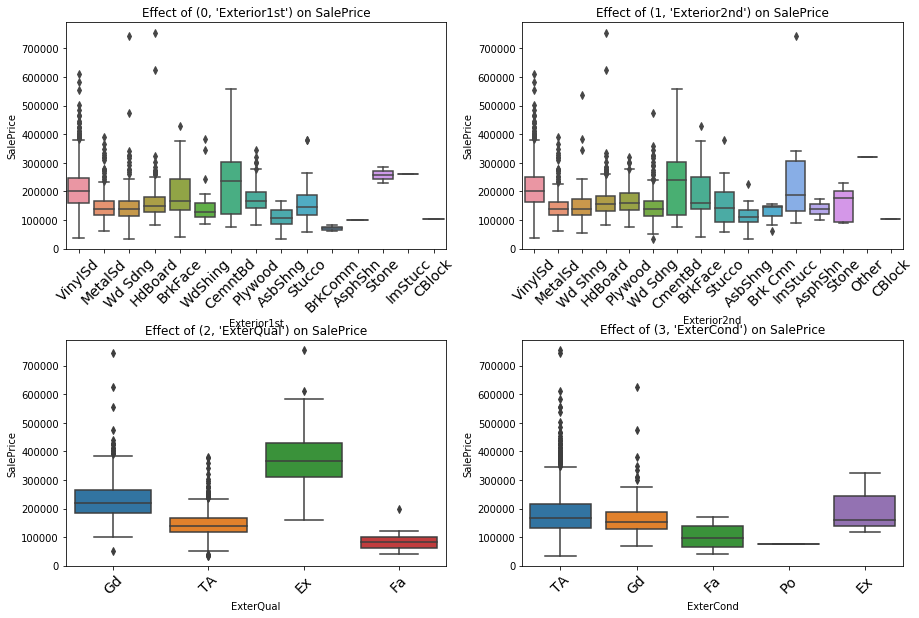

In [51]:
# Visualizing categorical features along with target variable
var = ['Exterior1st','Exterior2nd','ExterQual', 'ExterCond']

fig = plt.figure(figsize=(15,10))

for i in enumerate(var):
    plt.subplot(2, 2, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14, rotation = 45)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.4) #wspace=0.4

plt.show()

Inference:
1. Exterior covering on house having Stone, Vinyl Siding or Vinyl Siding tends to have higher sales price. While, houses having Stone as exterior covering have less sales prices.
2. Second Exterior covering on house made with Vinyl Siding or Vinyl Siding have high sales price.
3. Excellent Exterior quality and condition of house tends to have high sales price

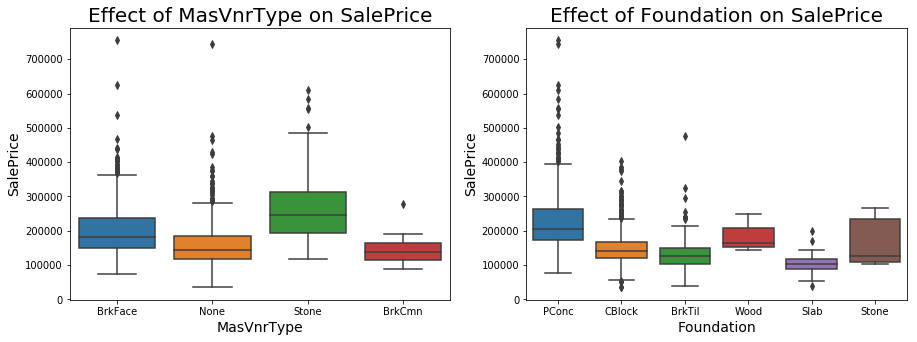

In [52]:
# Visualizing categorical features along with target variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = housing_data, x = 'MasVnrType', y = 'SalePrice')
plt.title("Effect of MasVnrType on SalePrice",fontsize=20)
plt.xlabel("MasVnrType", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data = housing_data, x = 'Foundation', y = 'SalePrice')
plt.title("Effect of Foundation on SalePrice",fontsize=20)
plt.xlabel("Foundation", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.show()

Inference:
1. Houses with Masonry veneer of type Stone have high sales price whereas, Common brick masonry have less sales price.
2. Houses having Poured Contrete in it's foundation seems to be having high sales price than houses with slab foundation.

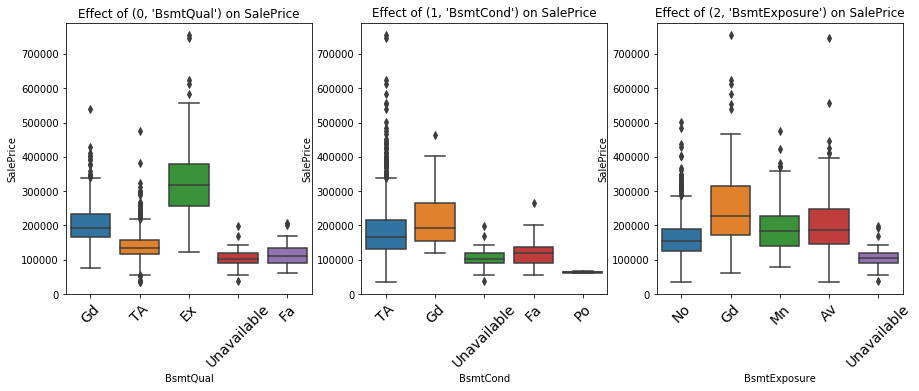

In [53]:
# Visualizing categorical features along with target variable
var = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
fig = plt.figure(figsize=(15,5))

for i in enumerate(var):
    plt.subplot(1, 3, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14, rotation = 45)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.3) #wspace=0.4

plt.show()

Inference:
1. Houses with no basement have lower sales price. 
2. If house have a basement and it's quality and condition is excellent then those houses will be having higher sales price
3. Basement with Good Exposure i.e, walkout or garden level walls have higher sales price.

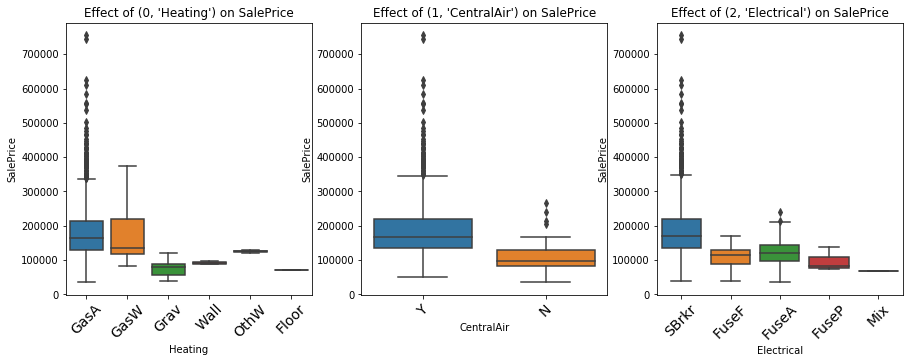

In [54]:
# Visualizing categorical features with target variable
var = ['Heating', 'CentralAir', 'Electrical']
fig = plt.figure(figsize=(15,5))

for i in enumerate(var):
    plt.subplot(1, 3, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14, rotation = 45)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.3) #wspace=0.4

plt.show()

Inference:
- Houses with Heating type as Gas forced warm air furnace/ Gas hot water or steam heat, having Central Air conditioning and electrical system with Standard Circuit Breakers & Romex tend to incerease the sale prices

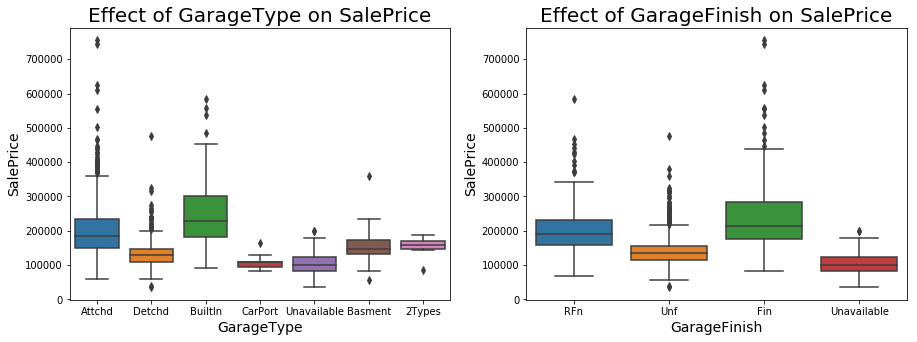

In [55]:
# Visualizing categorical features with target variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = housing_data, x = 'GarageType', y = 'SalePrice')
plt.title("Effect of GarageType on SalePrice",fontsize=20)
plt.xlabel("GarageType", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data = housing_data, x = 'GarageFinish', y = 'SalePrice')
plt.title("Effect of GarageFinish on SalePrice",fontsize=20)
plt.xlabel("GarageFinish", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.show()

Inference:
- Built-In garage i.e Garage part of house - typically has room above garage or even Garage Attached to home, have higher sales price.
- Houses without garage or just a Car Port or unfinished garage have lesser sales price.

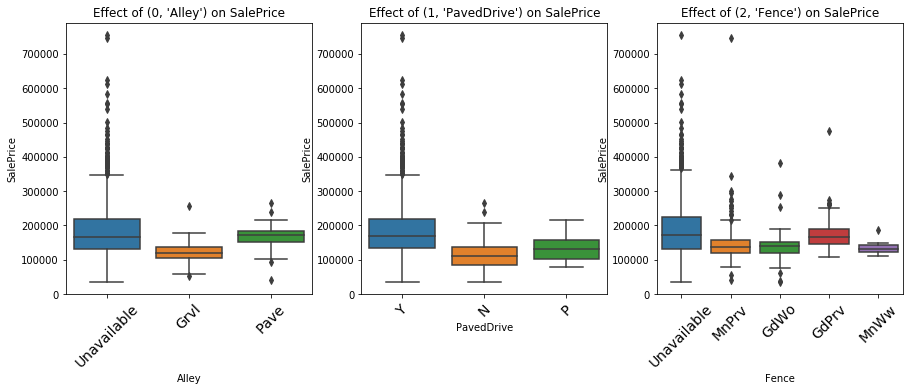

In [56]:
# Visualizing categorical features with target variable
var = ['Alley','PavedDrive','Fence']

fig = plt.figure(figsize=(15,5))

for i in enumerate(var):
    plt.subplot(1, 3, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14, rotation = 45)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.3) #wspace=0.4

plt.show()

Inference:
- Presence of Paved Drive does increase the sales price.
- From the plot we can see that eve if the property doesn't have access to Alley or Fence, sales price is high.

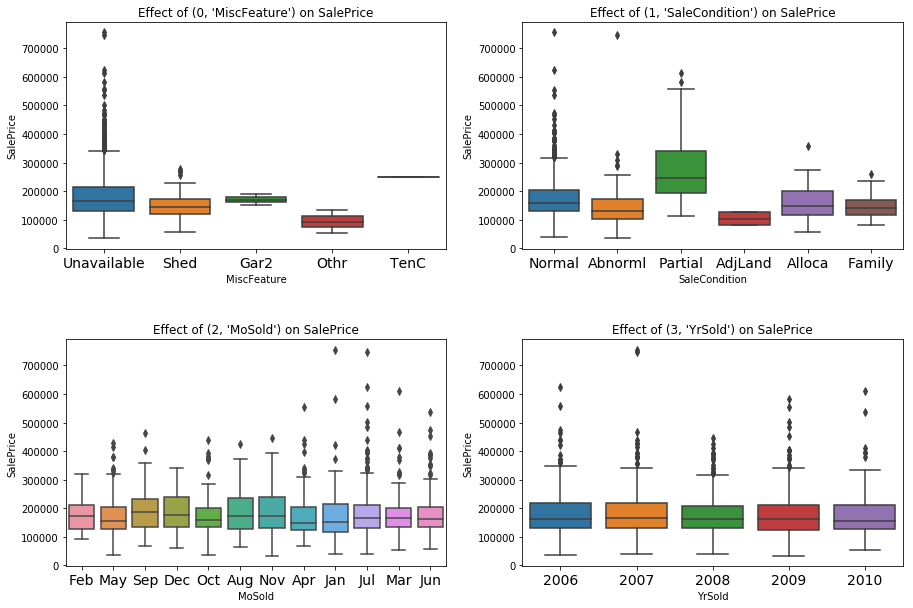

In [57]:
# Visualizing categorical features with target variable
var = ['MiscFeature','SaleCondition','MoSold','YrSold']

fig = plt.figure(figsize=(15,10))

for i in enumerate(var):
    plt.subplot(2, 2, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14)
    sns.boxplot(data = housing_data, x=i[1], y = 'SalePrice')
    plt.subplots_adjust(hspace=0.4) #wspace=0.4

plt.show()

Inference:
- Above features doesn't really provide useful insights related to changes in Sales Price of housing properties.

### 3.1.3 Numerical Variables

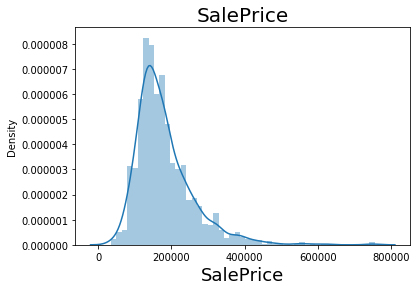

In [58]:
#Let's visualize the distribution of sale price
plt.figure()
sns.distplot(housing_data['SalePrice'])
plt.title('SalePrice', fontsize = 20)                  # Plot heading 
plt.xlabel('SalePrice', fontsize = 18)                         # X-label
plt.show()

In [59]:
# Checking percentile values and statistical parameters of Target variable
housing_data[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


#### The target variable is right skewed. As (linear) models usually perform well on normally distributed data , we need to transform this variable using Log transform and make it more normally distributed.

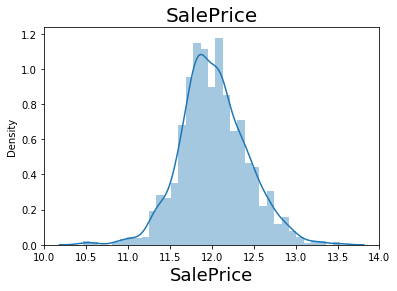

In [60]:
#Let's visualize the distribution of sale price after log transformation
plt.figure()
sns.distplot(np.log(housing_data['SalePrice']))
plt.title('SalePrice', fontsize = 20)                  # Plot heading 
plt.xlabel('SalePrice', fontsize = 18)                         # X-label
plt.show()

In [61]:
# Applying Log transformation on target variable
housing_data[['SalePrice']] = np.log(housing_data[['SalePrice']])
housing_data[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,12.024051
std,0.399452
min,10.460242
25%,11.775097
50%,12.001505
75%,12.273731
max,13.534473


### 3.2 Bivariate Analysis

### Correlation between numerical columns

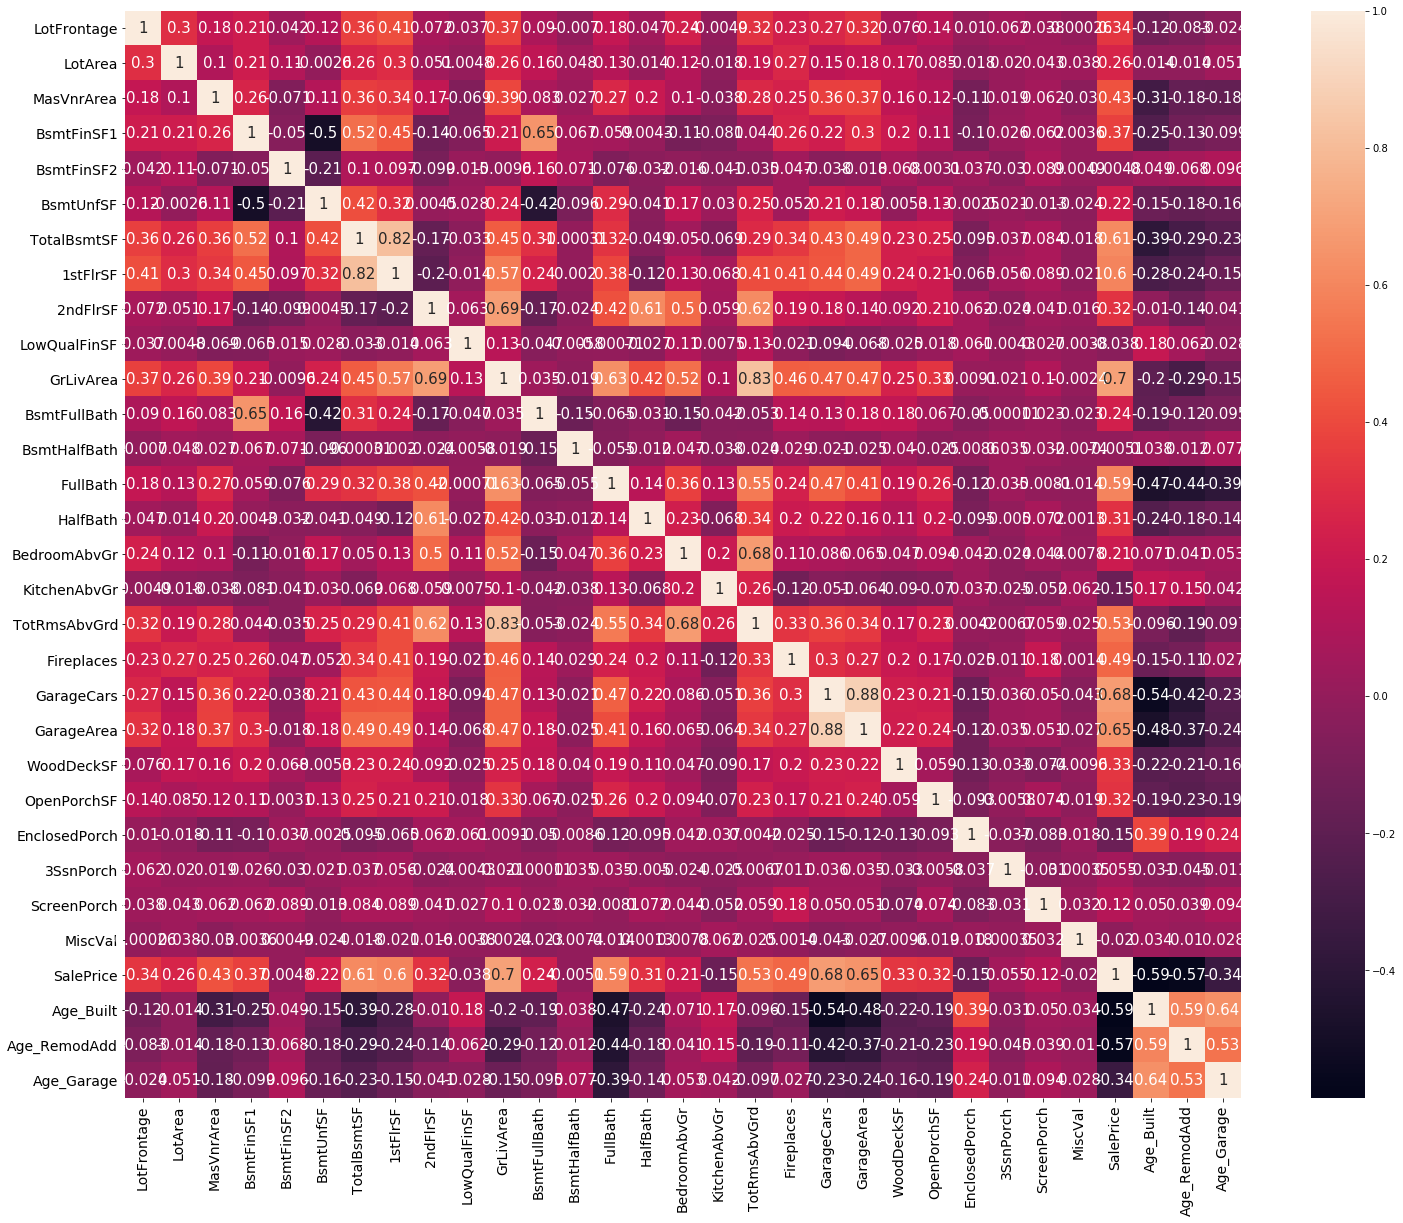

In [62]:
plt.figure(figsize=(25, 20))
sns.heatmap(housing_data[num_col].corr(), annot = True, annot_kws={'size': 15})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Based on above heatmap,
- SalePrice seems to be having high positive correlation (>0.6) with TotalBsmtSF, 1stFlrSf, GrLivArea, GarageCars and GarageArea.
- SaleProce is having negative correlation (<-0.5) with AgeBuilt of the property and Age_RemodAdd
- Also, GrLivArea and 2ndFlrSF, TotalBsmtSF and 1stFlrSF have high positive correlation among them

In [63]:
#Multicollinearity (remove) Let's remove highly correlated variables

housing_data.drop(labels=["2ndFlrSF","1stFlrSF","GarageArea","TotRmsAbvGrd","Age_Garage"],axis=1,inplace=True)

In [64]:
# NUMERICAL COLUMNS: 
num_col = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
print(len(num_col))

26


In [65]:
# Checking shape of our data
housing_data.shape

(1460, 71)

### 3.1.4 Visualization of Numerical Variable based on Target value

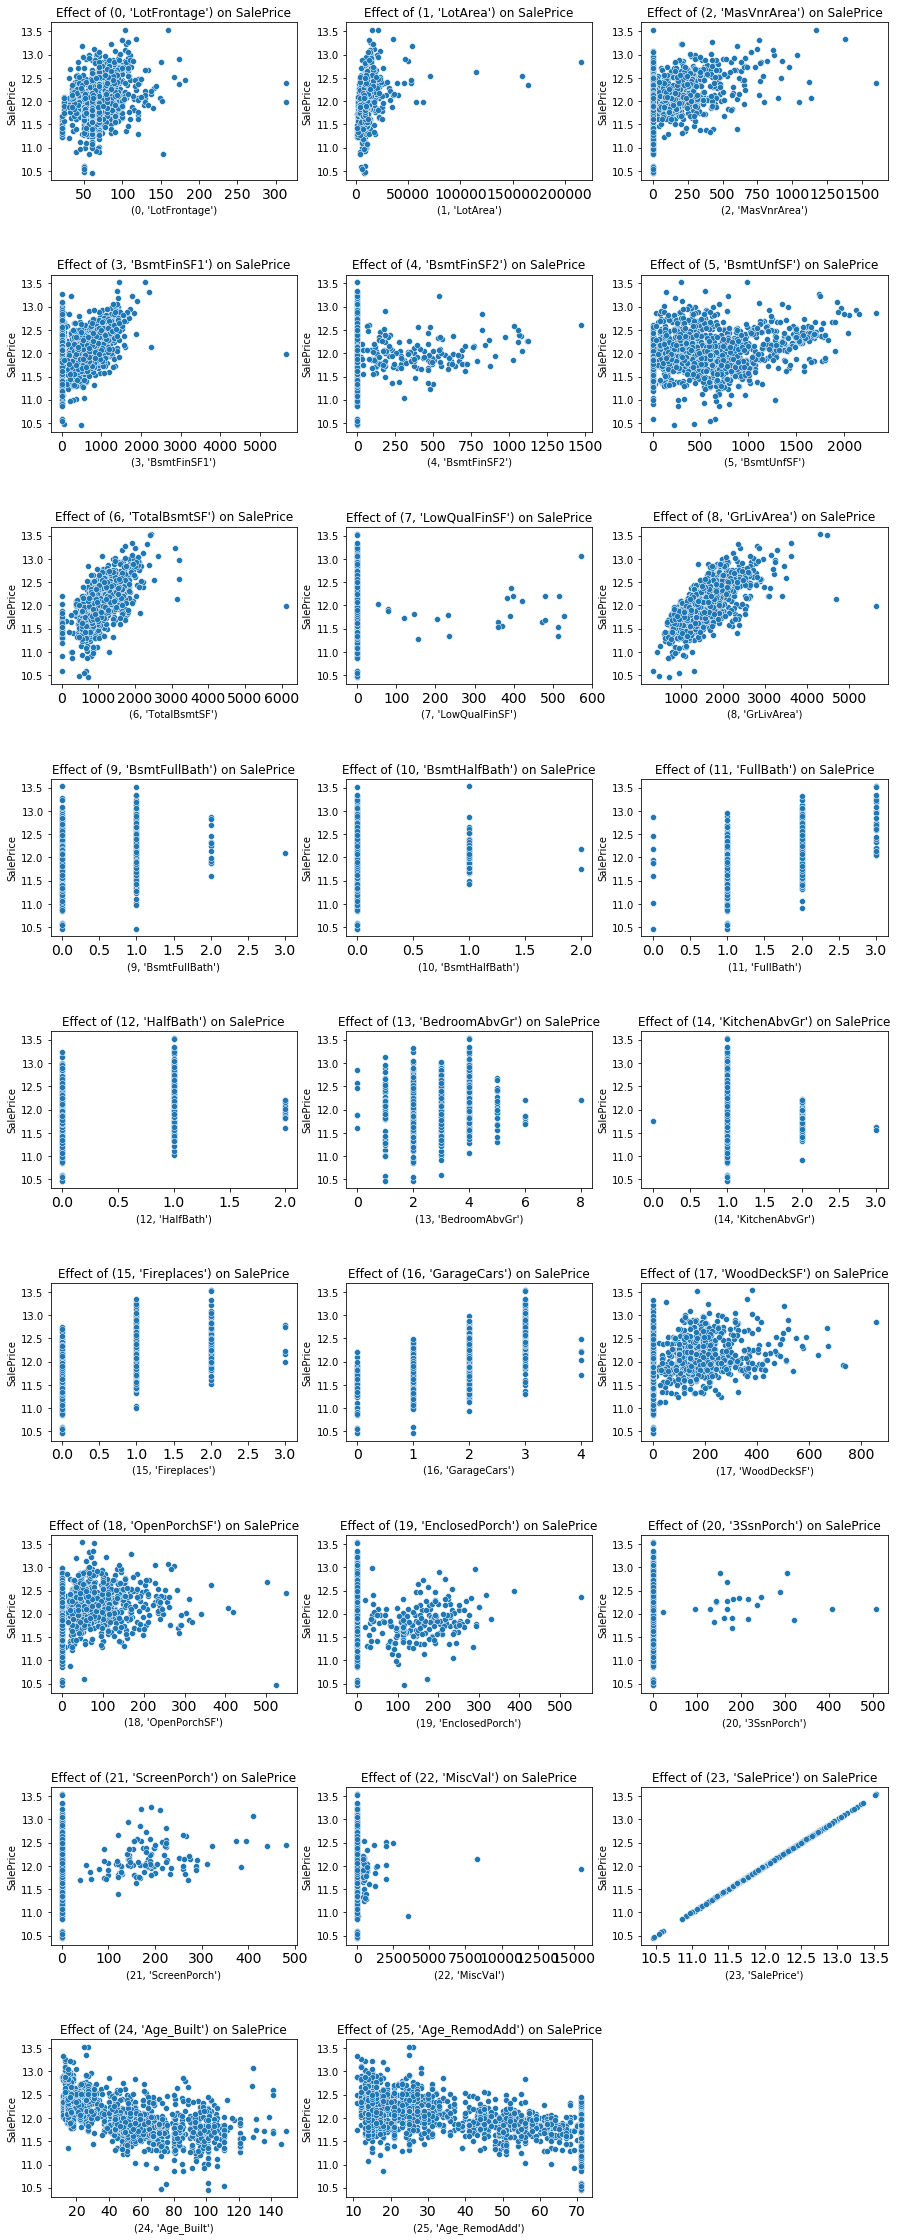

In [66]:
fig = plt.figure(figsize=(15,40)) #(20,80)

for i in enumerate(num_col):
    plt.subplot(9, 3, i[0]+1)
    plt.title('Effect of {} on SalePrice'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14)
    sns.scatterplot(data = housing_data, x=i[1], y = 'SalePrice') #hue='SalePrice'
    plt.subplots_adjust(hspace=0.6) #wspace=0.4

plt.show()

Observations from the above plots:-

- Total basement square feet, Above ground living area square feet seems to have somewhat linear relation with the target variable.
- Higher Number of fireplaces and garage size in terms of number of cars seems to be sold at higher sales price
- New housing properties are costlier than older housing properties.

There are outliers present in the data, we'll treat them in later stage after checking column wise skeness.

## Check Skewness and Kurtosis in data

## Skewness

- In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell curve) in a given set of data.
- High level of skewness can cause misleading results. The data transformation tools are helping to make the skewed data closer to a normal distribution. For positively skewed distributions, the famous transformation is the log transformation. The log transformation proposes the calculations of the natural logarithm for each value in the dataset.

- Fairly Symmetrical	-0.5 to 0.5
- Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
- Highly Skewed	< -1.0 and > 1.0

In [67]:
# Checking skewness and kurtosis of numerical columns
skewness_data = housing_data[num_col].agg(['skew', 'kurtosis']).transpose().sort_values('skew', ascending=False)
skewness_data

,skew,kurtosis
MiscVal,24.476794,701.003342
LotArea,12.207688,203.243271
3SsnPorch,10.304342,123.662379
LowQualFinSF,9.011341,83.234817
KitchenAbvGr,4.488397,21.532404
BsmtFinSF2,4.255261,20.113338
ScreenPorch,4.122214,18.439068
BsmtHalfBath,4.103403,16.396642
EnclosedPorch,3.089872,10.430766
MasVnrArea,2.677616,10.141416


In [68]:
# Storing names of columns having skewness > +1 and less than -1 i.e., are highly skewed
skewed = list(skewness_data[abs(skewness_data['skew']) > 1].index)
print(skewed)
print('Total columns with >1 Skewness: ', len(skewed))

['MiscVal', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'LotFrontage', 'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'GrLivArea']
Total columns with >1 Skewness:  16


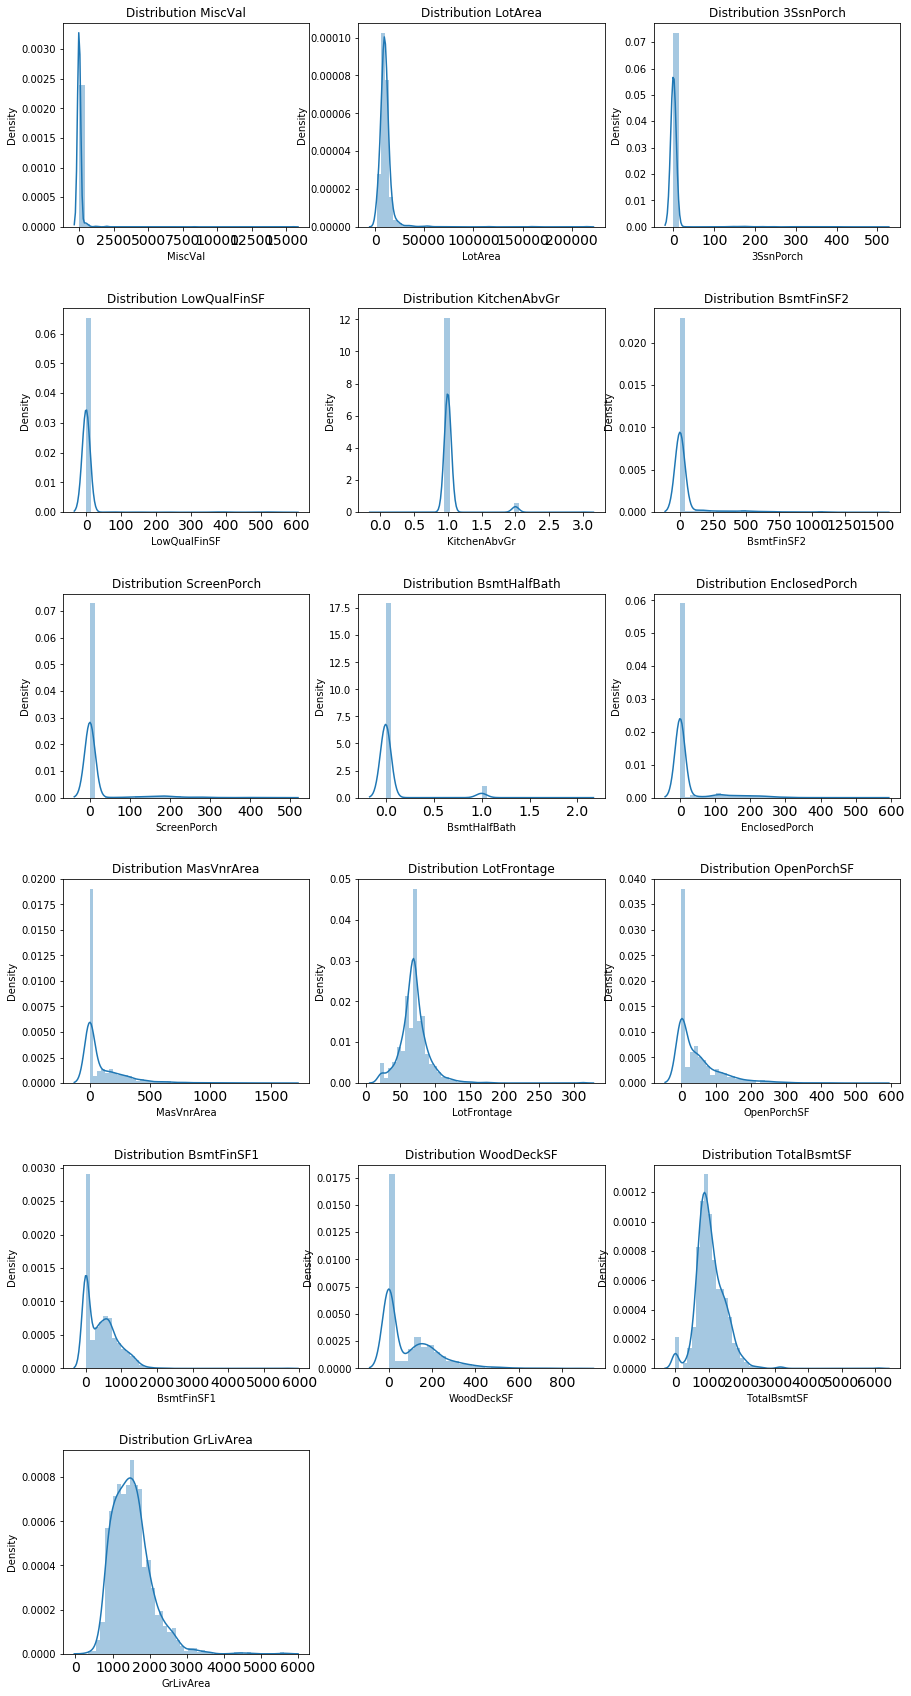

In [69]:
# Visualising the skeweness 
fig = plt.figure(figsize=(15, 30)) #(20,80)
i = 1

for column in skewed:
    plt.subplot(6, 3, i)
    plt.title('Distribution {}'.format(column))
    plt.xlabel(i)
    plt.xticks(fontsize=14)
    sns.distplot(housing_data[column])
    plt.subplots_adjust(hspace=0.4) 
    i = i + 1

plt.show()

In [70]:
# Applying BoxCox transform to treat the skewness
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for i in skewed:
    housing_data[i] = boxcox1p(housing_data[i], boxcox_normmax(housing_data[i] + 1))
    print('Treated Feature: ',i)

Treated Feature:  MiscVal
Treated Feature:  LotArea
Treated Feature:  3SsnPorch
Treated Feature:  LowQualFinSF
Treated Feature:  KitchenAbvGr
Treated Feature:  BsmtFinSF2
Treated Feature:  ScreenPorch
Treated Feature:  BsmtHalfBath
Treated Feature:  EnclosedPorch
Treated Feature:  MasVnrArea
Treated Feature:  LotFrontage
Treated Feature:  OpenPorchSF
Treated Feature:  BsmtFinSF1
Treated Feature:  WoodDeckSF
Treated Feature:  TotalBsmtSF
Treated Feature:  GrLivArea


## Kurtosis

- Kurtosis refers to the degree of presence of outliers in the distribution. Kurtosis measures whether data is heavy-tailed or light-tailed in a normal distribution. The kurtosis of a normal distribution is 3.
- Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution.
- An extreme positive kurtosis indicates a distribution where more of the numbers are located in the tails of the distribution instead of around the mean.

- If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

When data skewed, the tail region may behave as an outlier for the statistical model, and outliers unsympathetically affect the model’s performance especially regression-based models
So there is a necessity to transform the skewed data to close enough to a Normal distribution.

In [71]:
# Checking kurtosis values
kurt_data = housing_data.agg('kurtosis').transpose().sort_values(ascending=False)
kurt_data

3SsnPorch        58.762358
LowQualFinSF     53.267682
MiscVal          25.974655
KitchenAbvGr     19.887322
BsmtHalfBath     13.801481
ScreenPorch       9.676133
TotalBsmtSF       6.072079
BsmtFinSF2        5.413377
LotArea           4.606766
LotFrontage       4.283359
EnclosedPorch     3.630867
BedroomAbvGr      2.230875
MSSubClass        1.580188
SalePrice         0.809532
BsmtUnfSF         0.474994
GrLivArea         0.283494
GarageCars        0.220998
BsmtFinSF1       -0.042242
Fireplaces       -0.217237
MasVnrArea       -0.327316
WoodDeckSF       -0.375496
Age_Built        -0.439552
OpenPorchSF      -0.514478
BsmtFullBath     -0.839098
FullBath         -0.857043
HalfBath         -1.076927
YrSold           -1.190601
Age_RemodAdd     -1.272245
dtype: float64

In [72]:
# Storing the variable having high kurtosis value for further treatment
outliers = list(kurt_data[kurt_data > 3].index)
print(outliers)
print('Total columns with >3 Kurtosis: ', len(outliers))

['3SsnPorch', 'LowQualFinSF', 'MiscVal', 'KitchenAbvGr', 'BsmtHalfBath', 'ScreenPorch', 'TotalBsmtSF', 'BsmtFinSF2', 'LotArea', 'LotFrontage', 'EnclosedPorch']
Total columns with >3 Kurtosis:  11


#### Above features also showed high outiers in boxplot during our outlier check of numerical columns. Let's treat this outliers using IQR method

In [73]:
#Outlier Treatment using IQR

for column in outliers:
    Q1 = housing_data[column].quantile(.25)
    Q3 = housing_data[column].quantile(.95)
    IQR = Q3 - Q1
    housing_data = housing_data[(housing_data[column] >= Q1 - 1.5*IQR) & (housing_data[column] <= Q3 + 1.5*IQR)]
    print('Treated column: ',column, 'Shape: ',housing_data.shape)


Treated column:  3SsnPorch Shape:  (1436, 71)
Treated column:  LowQualFinSF Shape:  (1411, 71)
Treated column:  MiscVal Shape:  (1362, 71)
Treated column:  KitchenAbvGr Shape:  (1299, 71)
Treated column:  BsmtHalfBath Shape:  (1299, 71)
Treated column:  ScreenPorch Shape:  (1299, 71)
Treated column:  TotalBsmtSF Shape:  (1298, 71)
Treated column:  BsmtFinSF2 Shape:  (1298, 71)
Treated column:  LotArea Shape:  (1263, 71)
Treated column:  LotFrontage Shape:  (1262, 71)
Treated column:  EnclosedPorch Shape:  (1262, 71)


In [74]:
# Rechecking the numerical columns
print(num_col)
print(len(num_col))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'Age_Built', 'Age_RemodAdd']
26


In [75]:
# Shape of our final data before model building
housing_data.shape

(1262, 71)

## Step 4: Data Modelling

### 4.1 Dummy variable creation for Logistic regression

In [76]:
# Putting feature variable to X
X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age_Built,Age_RemodAdd
0,60,RL,9.646420,8.670456,Unavailable,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.340339,Gd,TA,PConc,Gd,TA,No,GLQ,118.098003,Unf,0.0,150,252.446471,GasA,Ex,Y,SBrkr,0.0,7.744830,1,0.000000,2,1,3,0.717357,Gd,Typ,0,Unavailable,Attchd,RFn,2,TA,TA,Y,0.000000,12.049772,0.000000,0.0,0.0,Unavailable,Unavailable,0.0,Feb,2008,WD,Normal,18,18
1,20,RL,10.586093,8.787628,Unavailable,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,TA,Gd,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,147.125745,Unf,0.0,284,342.556447,GasA,Ex,Y,SBrkr,0.0,7.416976,0,0.682506,2,0,3,0.717357,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,62.298509,0.000000,0.000000,0.0,0.0,Unavailable,Unavailable,0.0,May,2007,WD,Normal,45,45
2,60,RL,9.844618,8.933083,Unavailable,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.687637,Gd,TA,PConc,Gd,TA,Mn,GLQ,91.750439,Unf,0.0,434,267.178842,GasA,Ex,Y,SBrkr,0.0,7.791850,1,0.000000,2,1,3,0.717357,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0.000000,9.878686,0.000000,0.0,0.0,Unavailable,Unavailable,0.0,Sep,2008,WD,Normal,20,19
3,70,RL,9.302749,8.782836,Unavailable,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,52.861352,Unf,0.0,540,228.937528,GasA,Gd,Y,SBrkr,0.0,7.749246,1,0.000000,1,0,3,0.717357,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0.000000,8.946970,19.032389,0.0,0.0,Unavailable,Unavailable,0.0,Feb,2006,WD,Abnorml,106,51
4,60,RL,10.817370,9.150118,Unavailable,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.266439,Gd,TA,PConc,Gd,TA,Av,GLQ,112.267312,Unf,0.0,490,317.335350,GasA,Ex,Y,SBrkr,0.0,8.016604,1,0.000000,2,1,4,0.717357,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,46.391564,14.232142,0.000000,0.0,0.0,Unavailable,Unavailable,0.0,Dec,2008,WD,Normal,21,21


In [77]:
# Putting target variable to y
y = housing_data['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [78]:
# Checking shapes of datasets
print(X.shape)
print(y.shape)

(1262, 70)
(1262,)


In [79]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Unavailable,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Unavailable,Attchd,RFn,TA,TA,Y,Unavailable,Unavailable,Feb,2008,WD,Normal
1,20,RL,Unavailable,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,TA,Gd,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Unavailable,Unavailable,May,2007,WD,Normal
2,60,RL,Unavailable,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Unavailable,Unavailable,Sep,2008,WD,Normal
3,70,RL,Unavailable,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Unavailable,Unavailable,Feb,2006,WD,Abnorml
4,60,RL,Unavailable,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gd,TA,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Unavailable,Unavailable,Dec,2008,WD,Normal


In [80]:
# convert into dummies - one hot encoding
housing_categorical_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_categorical_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_Unavailable,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Fa,OverallQual_Gd,OverallQual_Po,OverallQual_TA,OverallCond_Fa,OverallCond_Gd,OverallCond_Po,OverallCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unavailable,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unavailable,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unavailable,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unavailable,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unavailable,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unavailable,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unavailable,GarageFinish_RFn,GarageFinish_Unavailable,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unavailable,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unavailable,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unavailable,MiscFeature_Unavailable,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,

In [81]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [82]:
# concat dummy variables with X
X = pd.concat([X, housing_categorical_dummies], axis=1)

In [83]:
X.shape

(1262, 268)

### 4.2 Test Train Split

In [84]:
from sklearn.model_selection import train_test_split

### Splitting the data into train and test

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4.3 Feature Scaling

In [86]:
# Importing MinMaxScaler from sklearn library

from sklearn.preprocessing import MinMaxScaler

# Creating instance of class
scaler = MinMaxScaler()

In [87]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = list(X.dtypes[X.dtypes !='object'].index)

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,Age_Built,Age_RemodAdd,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_Unavailable,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Fa,OverallQual_Gd,OverallQual_Po,OverallQual_TA,OverallCond_Fa,OverallCond_Gd,OverallCond_Po,OverallCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unavailable,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unavailable,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unavailable,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unavailable,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unavailable,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unavailable,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unavailable,GarageFinish_RFn,GarageFinish_Unavailable,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unavailable,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unavailable,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unavailable,MiscFeature_Unavailable,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_

In [88]:
# Applying scaler() to all numeric columns of test data set

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,Age_Built,Age_RemodAdd,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_Unavailable,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Fa,OverallQual_Gd,OverallQual_Po,OverallQual_TA,OverallCond_Fa,OverallCond_Gd,OverallCond_Po,OverallCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unavailable,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unavailable,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unavailable,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unavailable,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unavailable,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unavailable,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unavailable,GarageFinish_RFn,GarageFinish_Unavailable,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unavailable,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unavailable,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unavailable,MiscFeature_Unavailable,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_

## Step 5: Model Building

## Model 1: Linear Regression considering all variables

In [89]:
# Instantiate: Creating a instance of class LinearRegression and creating first fitted model
reg = LinearRegression()

# Fit a line
reg.fit(X_train, y_train)

LinearRegression()

In [90]:
# Print the coefficients and intercept
print(reg.intercept_)
print(reg.coef_)

130157792075.3368
[ 1.55741984e-02  2.33158878e-01  3.08454475e-02 -1.24415813e-01
 -1.43602746e-01 -2.76561392e-01  5.40231369e-01  1.75974936e+11
  1.01642406e+00  4.19994755e-02  2.71603343e-02  1.14802332e-01
  5.42289432e-02 -6.64195228e-03 -4.98243982e+10  4.14199108e-02
  1.69152782e-01  6.83586639e-02  1.30365692e-02  2.07986331e-03
 -3.80837737e+10  7.27300728e-02  5.69688200e+10 -1.92228636e-01
 -2.73211266e-02  6.03031437e-03 -1.76582513e+10 -9.49612694e+09
 -4.89848471e-02 -6.75849056e-02 -2.73097744e-02  5.14181736e+09
 -4.79964935e-02  3.42826843e-02  2.85898007e+10  3.06510925e-02
 -9.08527374e-02  3.48014832e-02  2.77041599e+10  5.76963425e-01
  4.48953390e-01  5.12047052e-01  4.90352631e-01  1.20868683e-02
  1.57149434e-02  3.25651169e-02  4.53300476e-02  2.24266052e-02
  7.63864517e-02 -3.21788788e-02  5.21278381e-02  9.73224640e-03
 -7.51590729e-02 -1.31711006e-01 -1.30815506e-02  2.77290344e-02
 -2.36293793e-01  7.23066330e-02  3.70979309e-04  8.40997696e-03
  4.012

In [91]:
# Making predictions
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# Checking metrics based on predictions
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score(Train): ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score(Test): ',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train): ',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test): ',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train): ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test): ',mse_test_lr)

R2 Score(Train):  0.9523163026084773
R2 Score(Test):  -1.1926058649677673e+21
RSS Score(Train):  6.265735209213147
RSS Score(Test):  8.048848869993028e+22
MSE Score(Train):  0.007095962864341049
MSE Score(Test):  2.1237068258556802e+20


#### Inference:
 1. Linear regression model with all the independent variables seems to highly overfitting as it is giving negative R2 Score on test set and very high R2 score on training set.
 2. MSE score on training set is less and on test set it seems to be increasing instead of minimising.

#### Let's use some feature selection techniques

## Model 2: Linear regression with RFE for Automated feature selection

In [92]:
# Importing RFE

from sklearn.feature_selection import RFE

# Creating a instance of class LinearRegression and creating first fitted model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
# running RFE with the output number of the features equal to 10

rfe = RFE(lr, 30)             
rfe = rfe.fit(X_train, y_train)

In [94]:
#Columns selected by RFE and their ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 201),
 ('LotArea', False, 49),
 ('MasVnrArea', False, 171),
 ('BsmtFinSF1', False, 169),
 ('BsmtFinSF2', False, 153),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', False, 32),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 114),
 ('BsmtHalfBath', False, 144),
 ('FullBath', False, 88),
 ('HalfBath', False, 106),
 ('BedroomAbvGr', False, 209),
 ('KitchenAbvGr', False, 31),
 ('Fireplaces', False, 112),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 200),
 ('EnclosedPorch', False, 231),
 ('3SsnPorch', False, 30),
 ('ScreenPorch', False, 76),
 ('MiscVal', False, 29),
 ('Age_Built', False, 42),
 ('Age_RemodAdd', False, 154),
 ('MSSubClass_30', False, 212),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 10),
 ('MSSubClass_50', False, 104),
 ('MSSubClass_60', False, 103),
 ('MSSubClass_70', False, 101),
 ('MSSubClass_75', False, 20),
 ('MSSubClass_80', False, 105),
 ('MSSubClass_85', False, 130),
 ('MSSub

In [95]:
#Print Columns selected by RFE. We will start with these columns for manual elimination

X_train.columns[rfe.support_]

Index(['BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'MSSubClass_40',
       'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'BldgType_Duplex', 'OverallQual_Fa',
       'OverallQual_Gd', 'OverallQual_Po', 'OverallQual_TA', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'Exterior1st_BrkComm', 'BsmtQual_Unavailable',
       'Heating_Wall', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Mod',
       'Functional_Sev', 'GarageType_BuiltIn', 'GarageQual_Po',
       'MiscFeature_Unavailable', 'SaleType_Oth', 'SaleCondition_Alloca'],
      dtype='object')

In [96]:
# Checking the feature names not selected by RFE

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=238)

In [97]:
# Storing the selected features names for further model building
col = list(X_train.columns[rfe.support_])

In [98]:
#r2score,RSS and RMSE
# MAking predictions on training and testing datasets
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

# Checking the metrices
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score(Train): ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score(Test): ',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train): ',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test): ',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train): ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test): ',mse_test_lr)

R2 Score(Train):  0.8778235971213704
R2 Score(Test):  0.8453224215793624
RSS Score(Train):  16.05422882722466
RSS Score(Test):  10.43912736684265
MSE Score(Train):  0.018181459600480926
MSE Score(Test):  0.027543871680323614


### Inference:
1. After selecting 30 features using RFE the linear regression model seems to perform much better, as compared to earlier model with all variables.
2. R2 score for test set is not so close training set score but within 5% of the score, which is acceptable.
3. MSE score of test is more by 0.01 than training MSE score

#### Let's see if we can increase the R2 score by treating multicollinearity and removing insignificant features

### Building Linear Regression Model using statsmodel.api

In [99]:
#Function to build a model using statsmodel api
#It will take the list columns to be selected for model as a parameter
import statsmodels.api as sm

def build_model(cols):
    
    # Adding a constant variable 
    X_train_sm = sm.add_constant(X_train[cols])
    
    # Running and creating a fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Printing summary statistics of model
    print(lm.summary())
    return lm

In [100]:
#Function to calculate VIFs and print them
#It will take the list columns to be selected for model as a parameter

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(cols):
    
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [101]:
#Selected columns for Model 1 - all columns selected by RFE

build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     28.70
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          8.51e-101
Time:                        22:45:35   Log-Likelihood:                -126.99
No. Observations:                 883   AIC:                             310.0
Df Residuals:                     855   BIC:                             443.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [102]:
# Removing Infinity VIF columns from list
col.remove('RoofStyle_Shed')
col.remove('MSSubClass_40')
col.remove('MSSubClass_90')
col.remove('BldgType_Duplex')

# Rebuilding the model
build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     221.7
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:45:36   Log-Likelihood:                 475.82
No. Observations:                 883   AIC:                            -899.6
Df Residuals:                     857   BIC:                            -775.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [103]:
# Removing high VIF valued column and rebuilding the model
col.remove('MiscFeature_Unavailable')
build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     245.3
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:45:37   Log-Likelihood:                 514.69
No. Observations:                 883   AIC:                            -977.4
Df Residuals:                     857   BIC:                            -853.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8127 

In [104]:
# Removing high VIF valued column
col.remove('MSZoning_RL')
build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:45:37   Log-Likelihood:                 486.91
No. Observations:                 883   AIC:                            -923.8
Df Residuals:                     858   BIC:                            -804.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3459 

In [105]:
# Removing high VIF column
col.remove('GrLivArea')
build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          2.14e-285
Time:                        22:45:39   Log-Likelihood:                 308.44
No. Observations:                 883   AIC:                            -568.9
Df Residuals:                     859   BIC:                            -454.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8802 

In [106]:
# As we can see removing feature GrLivArea dropped the R2-score from 0.86 to 0.804
# Let's keep the feature in list and treat the model according to P-value score
col.append('GrLivArea')

# Removing high P valued column
col.remove('Heating_Wall')
build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     248.5
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:45:39   Log-Likelihood:                 486.68
No. Observations:                 883   AIC:                            -925.4
Df Residuals:                     859   BIC:                            -810.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3459 

In [107]:
# Removing high P valued columns
col.remove('HeatingQC_Po')
col.remove('SaleType_Oth')
col.remove('GarageQual_Po')
lm = build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     285.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:45:40   Log-Likelihood:                 484.49
No. Observations:                 883   AIC:                            -927.0
Df Residuals:                     862   BIC:                            -826.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3443 

In [108]:
# Removing variable with P-value > 0.05
col.remove('SaleCondition_Alloca')
lm = build_model(col)
calc_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     299.3
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:45:40   Log-Likelihood:                 482.96
No. Observations:                 883   AIC:                            -925.9
Df Residuals:                     863   BIC:                            -830.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3471 

#### Removing further variables with high VIF is reducing the R2 score suddenly by 6-7% approx.
#### Let's make predictions using above features and check the performance on test set.

In [109]:
# Building the model and Predicting the values of train and test set
X_train_sm = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lm.predict(X_train_sm)

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = lm.predict(X_test_sm)

# Checking the metrics
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2 Score(Train): ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print('R2 Score(Test): ',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('RSS Score(Train): ',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('RSS Score(Test): ',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE Score(Train): ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('MSE Score(Test): ',mse_test_lr)

R2 Score(Train):  0.868233975990972
R2 Score(Test):  0.8535662869891918
RSS Score(Train):  17.314324626138813
RSS Score(Test):  9.882752216112758
MSE Score(Train):  0.019608521660406355
MSE Score(Test):  0.026075863367052133


#### Inference:
- R2 score of train set and test set somewhat same.
- MSE score is also minimised and is approximately same for both the sets.
- Although the removal of high VIF and high p-valued features didn't change the R2 score as compared to model with all 30 selected features.

## Model 2: Linear regression using RandomForest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

After trying different hyper parameters using GridSearch below parameters were giving better results in terms of R2 and MSE score. 
Hence, this parameters were used.
(Note: Hyperparameter tuning code takes high computational time to find best estimator. Hence it was removed fron this notebook.)

In [111]:
# Initiating class instance
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=6, min_samples_leaf=10)

In [112]:
# Fitting the regressor on data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [113]:
# Making predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Checking metrics
r2_train_rf = r2_score(y_train, y_train_pred)
print('R2 Score(Train): ',r2_train_rf)

r2_test_rf = r2_score(y_test, y_test_pred)
print('R2 Score(Test): ',r2_test_rf)

rss1_rf = np.sum(np.square(y_train - y_train_pred))
print('RSS Score(Train): ',rss1_rf)

rss2_rf = np.sum(np.square(y_test - y_test_pred))
print('RSS Score(Test): ',rss2_rf)

mse_train_rf = mean_squared_error(y_train, y_train_pred)
print('MSE Score(Train): ',mse_train_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred)
print('MSE Score(Test): ',mse_test_rf)

R2 Score(Train):  0.886718479613743
R2 Score(Test):  0.8106461563415486
RSS Score(Train):  14.885423104030451
RSS Score(Test):  12.77941451847845
MSE Score(Train):  0.01685778380977401
MSE Score(Test):  0.03371877181656583


Inference:
- R2 score of test seems to be less than the R2 score of train set. It can be the case of slight overfitting on train set.
- Although we can take a look at important features considered by random forest regressor

In [114]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
11,FullBath,0.336955
8,GrLivArea,0.235286
16,GarageCars,0.151295
153,ExterQual_TA,0.076035
23,Age_Built,0.040430
6,TotalBsmtSF,0.040057
104,OverallQual_Gd,0.015347
3,BsmtFinSF1,0.012223
24,Age_RemodAdd,0.009938
12,HalfBath,0.009584


# Using Regularization techniques

## Ridge Regression

In [115]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 28 candidates, totalling 196 fits


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Storing the results obtained by GridSearch
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.014288,0.003743,0.012372,0.005399,0.0001,{'alpha': 0.0001},-0.106550,-0.104927,-0.101335,-0.077165,-0.097545,-0.092154,-0.086293,-0.095138,0.009859,23,-0.052207,-0.053306,-0.053639,-0.057452,-0.053808,-0.056548,-0.056902,-0.054837,0.001919
1,0.020841,0.007896,0.008280,0.007023,0.001,{'alpha': 0.001},-0.106507,-0.104907,-0.101245,-0.077178,-0.097502,-0.092047,-0.086230,-0.095088,0.009849,22,-0.052208,-0.053309,-0.053643,-0.057457,-0.053811,-0.056551,-0.056904,-0.054841,0.001920
2,0.020916,0.007465,0.007287,0.007307,0.01,{'alpha': 0.01},-0.106085,-0.104705,-0.100418,-0.077309,-0.097131,-0.091093,-0.085643,-0.094626,0.009752,21,-0.052228,-0.053358,-0.053698,-0.057514,-0.053859,-0.056583,-0.056935,-0.054882,0.001922
3,0.019053,0.005645,0.007293,0.007384,0.05,{'alpha': 0.05},-0.104424,-0.103740,-0.098076,-0.077788,-0.095954,-0.088797,-0.083670,-0.093207,0.009382,20,-0.052415,-0.053683,-0.053993,-0.057842,-0.054171,-0.056856,-0.057196,-0.055165,0.001937
4,0.016444,0.001293,0.007668,0.007225,0.1,{'alpha': 0.1},-0.102983,-0.102604,-0.096670,-0.078298,-0.094963,-0.086895,-0.081971,-0.092055,0.009087,19,-0.052707,-0.054129,-0.054403,-0.058265,-0.054613,-0.057272,-0.057607,-0.055571,0.001959


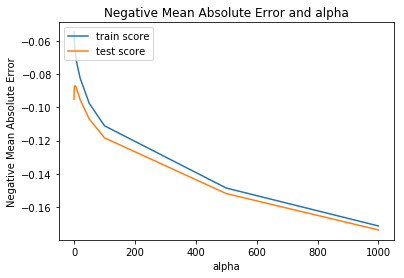

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [119]:
#Fitting Ridge model for best parameter value obtained i.e., alpha = 4.0 and checking the coefficients penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4.71515297e-02  1.79571465e-01  5.29073961e-02  1.32645349e-01
  5.97168826e-02  8.66534807e-02  2.08207846e-01  0.00000000e+00
  3.68190491e-01  5.23237809e-02  2.42797032e-02  1.66550570e-01
  9.61690014e-02  1.06082312e-01  0.00000000e+00  6.75402864e-02
  1.75423798e-01  7.35236330e-02  3.56147671e-02 -9.74272427e-04
  0.00000000e+00  5.88503818e-02  0.00000000e+00 -3.93229674e-02
 -6.25556235e-02 -6.76476233e-02  3.43521026e-02 -7.86552001e-03
  2.27156316e-02  5.99721104e-03  4.46014912e-02  4.39376420e-02
 -8.15264024e-03  1.21349402e-02 -3.87480203e-02 -7.69732628e-03
 -5.20515593e-02 -3.00566267e-03 -1.12196688e-02  1.02397000e-01
  2.79290766e-02  9.05135082e-02  7.81641638e-02  1.34012470e-02
 -9.70529674e-03  1.21700954e-02  4.06502261e-02  1.54796675e-02
  4.36420134e-02 -2.76016313e-02  4.02379513e-02  1.76576965e-02
 -6.28177292e-02 -4.88686364e-02 -1.69559319e-02  2.67680431e-02
 -3.48941753e-02  1.12892019e-02 -2.70648982e-02  2.05761925e-02
 -1.91780979e-02  1.02814

In [120]:
# Making predictions on train and test datasets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Checking the metrics and storing them in a dataframe for further comparison
metric_data = pd.DataFrame()
r2_train_ridge = r2_score(y_train, y_pred_train)
print('R2 Score(Train): ',r2_train_ridge)
metric_data.loc["R2 Score(Train)", 'Ridge 4.0'] = round(100*r2_train_ridge, 3)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('R2 Score(Test): ',r2_test_ridge)
metric_data.loc["R2 Score(Test)", 'Ridge 4.0'] = round(100*r2_test_ridge, 3)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train): ',rss1_ridge)
metric_data.loc["RSS Score(Train)", 'Ridge 4.0'] = round(rss1_ridge, 3)
                                                        
rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test): ',rss2_ridge)
metric_data.loc["RSS Score(Test)", 'Ridge 4.0'] = round(rss2_ridge, 3)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train): ',mse_train_ridge)
metric_data.loc["RMSE Score(Train)", 'Ridge 4.0'] = round(mse_train_ridge**0.5, 3)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test): ',mse_test_ridge)
metric_data.loc["RMSE Score(Test)", 'Ridge 4.0'] = round(mse_test_ridge**0.5, 3)

R2 Score(Train):  0.9337055583754962
R2 Score(Test):  0.8907263240474295
RSS Score(Train):  8.711225005291375
RSS Score(Test):  7.374836306331624
MSE Score(Train):  0.009865486982209938
MSE Score(Test):  0.01945867099295943


#### Inference:
- Train R2 score and test R2 score has difference of approx 5%.
- MSE score is minimised and similar on both train and test set.

## Lasso Regression

In [121]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 7
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 28 candidates, totalling 196 fits


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [122]:
# Storing the results obtained by GridSearch
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.159467,0.064192,0.007619,0.007781,0.0001,{'alpha': 0.0001},-0.094089,-0.093711,-0.089975,-0.075840,-0.083942,-0.076325,-0.069253,-0.083305,0.009035,2,-0.055323,-0.056296,-0.055948,-0.059873,-0.056874,-0.058913,-0.059177,-0.057486,0.001666
1,0.029461,0.010116,0.006695,0.007731,0.001,{'alpha': 0.001},-0.086700,-0.084804,-0.091936,-0.077719,-0.085369,-0.071801,-0.067539,-0.080838,0.008124,1,-0.068571,-0.070974,-0.069727,-0.072459,-0.071447,-0.072404,-0.073649,-0.071319,0.001609
2,0.021112,0.007323,0.006163,0.007386,0.01,{'alpha': 0.01},-0.127550,-0.135150,-0.150241,-0.132745,-0.140416,-0.119548,-0.106395,-0.130292,0.013224,3,-0.122631,-0.126966,-0.123327,-0.126993,-0.126494,-0.127871,-0.128369,-0.126093,0.002060
3,0.015911,0.004146,0.005441,0.006526,0.05,{'alpha': 0.05},-0.197363,-0.225513,-0.216372,-0.234785,-0.216824,-0.201356,-0.189533,-0.211678,0.015003,4,-0.210052,-0.209757,-0.208179,-0.209885,-0.208030,-0.210380,-0.212175,-0.209780,0.001299
4,0.017167,0.004702,0.013224,0.004198,0.1,{'alpha': 0.1},-0.261250,-0.276749,-0.263853,-0.311987,-0.287802,-0.269259,-0.268505,-0.277058,0.016448,5,-0.279227,-0.271642,-0.275358,-0.274910,-0.277814,-0.275709,-0.280156,-0.276402,0.002687


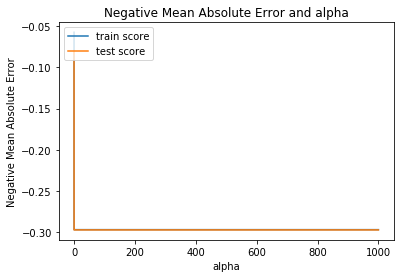

In [123]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [124]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [125]:
#Fitting Lasso model for best parameter value obtained i.e., alpha = 4.0 and checking the coefficients penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [126]:
lasso.coef_

array([ 5.13093432e-03,  1.76322312e-01,  2.39636864e-02,  7.41564913e-02,
        0.00000000e+00,  0.00000000e+00,  2.98972851e-01,  0.00000000e+00,
        1.01946021e+00,  3.71245917e-02,  1.11930887e-03,  7.73049265e-02,
        4.28190827e-02,  3.06273056e-03,  0.00000000e+00,  0.00000000e+00,
        2.20909446e-01,  5.92397899e-02,  9.83630354e-04, -0.00000000e+00,
        0.00000000e+00,  3.84812763e-02,  0.00000000e+00, -3.53099952e-02,
       -6.49302136e-02, -4.63192344e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -3.56135747e-02,  0.00000000e+00,  0.00000000e+00,  4.59502873e-02,
        0.00000000e+00,  3.63755819e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.61233090e-04,
        1.27497088e-03, -0.00000000e+00,  1.33363808e-02,  0.00000000e+00,
       -1.43400136e-02, -

In [127]:
# Making Predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Checking the metrics
r2_train_lasso = r2_score(y_train, y_pred_train)
print('R2 Score(Train): ',r2_train_lasso)
metric_data.loc["R2 Score(Train)", 'Lasso 0.001'] = round(100*r2_train_lasso, 3)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('R2 Score(Test): ',r2_test_lasso)
metric_data.loc["R2 Score(Test)", 'Lasso 0.001'] = round(100*r2_test_lasso, 3)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train): ',rss1_lasso)
metric_data.loc["RSS Score(Train)", 'Lasso 0.001'] = round(rss1_lasso, 3)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test): ',rss2_lasso)
metric_data.loc["RSS Score(Test)", 'Lasso 0.001'] = round(rss2_lasso, 3)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train): ',mse_train_lasso)
metric_data.loc["RMSE Score(Train)", 'Lasso 0.001'] = round(mse_train_lasso**0.5, 3)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test): ',mse_test_lasso)
metric_data.loc["RMSE Score(Test)", 'Lasso 0.001'] = round(mse_test_lasso**0.5, 3)

R2 Score(Train):  0.9183918417974453
R2 Score(Test):  0.9041326060336027
RSS Score(Train):  10.72347863485289
RSS Score(Test):  6.470051743510991
MSE Score(Train):  0.012144369914895686
MSE Score(Test):  0.017071376631955123


Inference: 
- R2 values for train set and test set are almost similar. Model doesn't seem to overfit.
- MSE score is also minimised and same for both train and test set.
- Lasso Regression gave us a simpler model with most of the coefficients as zero values. Thus, Lasso Regression has helped us in the feature selection.
- Also the R2 value for train and test datasets are approx 91% and 90% respectively, which is much better than the scores of models built earlier.

### Storing obtained beta coefficient values in a dataframe for comparison

In [128]:
# Creating dataframe
betas = pd.DataFrame(index=X.columns)

In [129]:
# Storing column names
betas.rows = X.columns

In [130]:
# Storing the coefficient values obtained from different models
betas['Linear'] = reg.coef_
betas['RF Regressor'] = rf.feature_importances_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [131]:
# Checking the coefficient values in comparison with Lasso regression 
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso', ascending=False).head(20)

,Linear,RF Regressor,Ridge,Lasso
GrLivArea,1.016424,0.235286,0.368190,1.019460
TotalBsmtSF,0.540231,0.040057,0.208208,0.298973
GarageCars,0.169153,0.151295,0.175424,0.220909
LotArea,0.233159,0.005965,0.179571,0.176322
SaleType_New,0.094202,0.000057,0.054963,0.115191
Neighborhood_Crawfor,0.138002,0.000176,0.102815,0.105951
Neighborhood_StoneBr,0.197803,0.000000,0.158291,0.105227
Neighborhood_NridgHt,0.110594,0.000055,0.088255,0.095694
BsmtExposure_Gd,0.076634,0.000847,0.095219,0.078456
Functional_Typ,0.061476,0.000073,0.054954,0.078061


In [132]:
# Printing the important features as per the coefficient values given by Ridge and Lasso models
features_ridge = list(betas.sort_values('Ridge', ascending=False).head(20).index)
features_lasso = list(betas.sort_values('Lasso', ascending=False).head(20).index)

In [133]:
# Printing the feature names
print('Top 20 Imp features by Ridge Regression: ',features_ridge)
print('Top 20 Imp features by Lasso Regression: ',features_lasso)

Top 20 Imp features by Ridge Regression:  ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageCars', 'FullBath', 'Neighborhood_StoneBr', 'BsmtFinSF1', 'Neighborhood_NoRidge', 'BedroomAbvGr', 'Neighborhood_Crawfor', 'MSZoning_FV', 'HalfBath', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_NridgHt', 'BsmtUnfSF', 'MSZoning_RM', 'SaleCondition_Normal', 'WoodDeckSF', 'Exterior1st_BrkFace']
Top 20 Imp features by Lasso Regression:  ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'SaleType_New', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'Functional_Typ', 'FullBath', 'Neighborhood_NoRidge', 'BsmtFinSF1', 'SaleCondition_Normal', 'WoodDeckSF', 'CentralAir_Y', 'Neighborhood_Somerst', 'MSZoning_FV', 'BsmtFinType1_GLQ', 'HalfBath']


### The below mentioned variables are significant in predicting the price as per Ridge Regression:
1. GrLivArea
2. TotalBsmtSF
3. LotArea
4. GarageCars
5. FullBath
6. Neighborhood
7. BsmtFinSF1
8. BedroomAbvGr
9. MSZoning
10. HalfBath

### The below mentioned variables are significant in predicting the price as per Lasso Regression:
1. GrLivArea
2. TotalBsmtSF
3. GarageCars
4. LotArea
5. SaleType
6. Neighborhood
7. BsmtExposure
8. Functional
9. FullBath
10. BsmtFinSF1

## Subjective Questions - Solution (Q1 and Q3)

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer: 
Optimal value of alpha for Ridge regression is : 4.0
Optimal value of alpha for Ridge regression is : 0.001

### Ridge regression model with alpha value doubled i.e., alpha = 8.0

In [134]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 8.0
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)
ridge_double_coef = ridge_double.coef_

#Making predictions
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

# Evaluation metrics
r2_train_ridge = r2_score(y_train, y_pred_train)
print('R2 Score(Train) with doubled alpha: ',r2_train_ridge)
metric_data.loc["R2 Score(Train)", 'Ridge 8.0'] = round(100*r2_train_ridge, 3)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('R2 Score(Test) with doubled alpha: ',r2_test_ridge)
metric_data.loc["R2 Score(Test)", 'Ridge 8.0'] = round(100*r2_test_ridge, 3)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train) with doubled alpha: ',rss1_ridge)
metric_data.loc["RSS Score(Train)", 'Ridge 8.0'] = round(rss1_ridge, 3)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test) with doubled alpha: ',rss2_ridge)
metric_data.loc["RSS Score(Test)", 'Ridge 8.0'] = round(rss2_ridge, 3)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train) with doubled alpha: ',mse_train_ridge)
metric_data.loc["RMSE Score(Train)", 'Ridge 8.0'] = round(mse_train_ridge**0.5, 3)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test) with doubled alpha: ',mse_test_ridge)
metric_data.loc["RMSE Score(Test)", 'Ridge 8.0'] = round(mse_test_ridge**0.5, 3)


R2 Score(Train) with doubled alpha:  0.9242214666294756
R2 Score(Test) with doubled alpha:  0.8843874361472264
RSS Score(Train) with doubled alpha:  9.95745402760318
RSS Score(Test) with doubled alpha:  7.802645293451949
MSE Score(Train) with doubled alpha:  0.011276844878372798
MSE Score(Test) with doubled alpha:  0.02058745460013707


In [135]:
betas['Ridge_8.0'] = ridge_double.coef_
betas.sort_values(by = 'Ridge_8.0',ascending= False).head(5)

,Linear,RF Regressor,Ridge,Lasso,Ridge_8.0
GrLivArea,1.016424,0.235286,0.368190,1.019460,0.271534
TotalBsmtSF,0.540231,0.040057,0.208208,0.298973,0.181516
GarageCars,0.169153,0.151295,0.175424,0.220909,0.160870
FullBath,0.114802,0.336955,0.166551,0.077305,0.153654
LotArea,0.233159,0.005965,0.179571,0.176322,0.148429


### Lasso regression model with alpha value doubled i.e., alpha = 0.002

In [136]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.002
lasso_double = Lasso(alpha=alpha)

lasso_double.fit(X_train, y_train)
lasso_double_coef = lasso_double.coef_

#Making predictions
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

# Evaluation metrics
r2_train_lasso = r2_score(y_train, y_pred_train)
print('R2 Score(Train) with doubled alpha: ',r2_train_lasso)
metric_data.loc["R2 Score(Train)", 'Lasso 0.002'] = round(100*r2_train_lasso, 3)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('R2 Score(Test) with doubled alpha: ',r2_test_lasso)
metric_data.loc["R2 Score(Test)", 'Lasso 0.002'] = round(100*r2_test_lasso, 3)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train) with doubled alpha: ',rss1_lasso)
metric_data.loc["RSS Score(Train)", 'Lasso 0.002'] = round(rss1_lasso, 3)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test) with doubled alpha: ',rss2_lasso)
metric_data.loc["RSS Score(Test)", 'Lasso 0.002'] = round(rss2_lasso, 3)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train) with doubled alpha: ',mse_train_lasso)
metric_data.loc["RMSE Score(Train)", 'Lasso 0.002'] = round(mse_train_lasso**0.5, 3)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test) with doubled alpha: ',mse_test_lasso)
metric_data.loc["RMSE Score(Test)", 'Lasso 0.002'] = round(mse_test_lasso**0.5, 3)

R2 Score(Train) with doubled alpha:  0.8996346752167564
R2 Score(Test) with doubled alpha:  0.8901146673387832
RSS Score(Train) with doubled alpha:  13.188208626420039
RSS Score(Test) with doubled alpha:  7.416116770840691
MSE Score(Train) with doubled alpha:  0.014935683608629716
MSE Score(Test) with doubled alpha:  0.019567590424381772


In [137]:
betas['Lasso_0.002'] = lasso_double.coef_
betas.sort_values(by = 'Lasso_0.002',ascending= False).head(5)

,Linear,RF Regressor,Ridge,Lasso,Ridge_8.0,Lasso_0.002
GrLivArea,1.016424,0.235286,0.368190,1.019460,0.271534,1.024676
TotalBsmtSF,0.540231,0.040057,0.208208,0.298973,0.181516,0.277872
GarageCars,0.169153,0.151295,0.175424,0.220909,0.160870,0.248403
LotArea,0.233159,0.005965,0.179571,0.176322,0.148429,0.150000
SaleType_New,0.094202,0.000057,0.054963,0.115191,0.048211,0.093634


In [138]:
# Checking the evaluation metric values og Ridge and Lasso Regression for doubled alpha
metric_data

,Ridge 4.0,Lasso 0.001,Ridge 8.0,Lasso 0.002
R2 Score(Train),93.371,91.839,92.422,89.963
R2 Score(Test),89.073,90.413,88.439,89.011
RSS Score(Train),8.711,10.723,9.957,13.188
RSS Score(Test),7.375,6.470,7.803,7.416
RMSE Score(Train),0.099,0.110,0.106,0.122
RMSE Score(Test),0.139,0.131,0.143,0.140


In [139]:
features_ridge_double = list(betas.sort_values('Ridge_8.0', ascending=False).head(20).index)
features_lasso_double = list(betas.sort_values('Lasso_0.002', ascending=False).head(20).index)

In [140]:
print('Top 20 Imp features by Ridge Regression 0.8: ',features_ridge_double)
print('Top 20 Imp features by Lasso Regression 0.002: ',features_lasso_double)

Top 20 Imp features by Ridge Regression 0.8:  ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'LotArea', 'Neighborhood_StoneBr', 'BsmtFinSF1', 'BedroomAbvGr', 'Neighborhood_NoRidge', 'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'HalfBath', 'BsmtUnfSF', 'Neighborhood_NridgHt', 'WoodDeckSF', 'SaleCondition_Normal', 'MSZoning_FV', 'MSZoning_RL', 'Exterior1st_BrkFace', 'Fireplaces']
Top 20 Imp features by Lasso Regression 0.002:  ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'SaleType_New', 'Neighborhood_NridgHt', 'Functional_Typ', 'BsmtFinSF1', 'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'CentralAir_Y', 'FullBath', 'BsmtFinType1_GLQ', 'Neighborhood_Somerst', 'PavedDrive_Y', 'SaleCondition_Normal', 'WoodDeckSF', 'Neighborhood_NoRidge', 'MSZoning_RL', 'Condition1_Norm']


Model evaluation score showed decrease in values after doubling the alpha value. But since the alpha value was quite small, doubling it does not make any significant change the most important predictor variables remain the same.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Answer: 

In [141]:
X_train_new = X_train.drop(['GrLivArea','TotalBsmtSF', 'GarageCars', 'LotArea', 'SaleType_New'],axis=1)
X_test_new = X_test.drop(['GrLivArea','TotalBsmtSF', 'GarageCars', 'LotArea', 'SaleType_New'],axis=1)

In [142]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.001
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_new, y_train)
lasso_new_coef = lasso_new.coef_

#Making predictions
y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

# Evaluation metrics
metric = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print('R2 Score(Train) without earlier 5 features: ',r2_train_lasso)
metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('R2 Score(Test) earlier 5 features: ',r2_test_lasso)
metric.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print('RSS Score(Train) earlier 5 features: ',rss1_lasso)
metric.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print('RSS Score(Test) earlier 5 features: ',rss2_lasso)
metric.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('MSE Score(Train) earlier 5 features: ',mse_train_lasso)
metric.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print('MSE Score(Test) earlier 5 featuresa: ',mse_test_lasso)
metric.append(mse_test_lasso**0.5)


R2 Score(Train) without earlier 5 features:  0.8979360220791349
R2 Score(Test) earlier 5 features:  0.863470476216918
RSS Score(Train) earlier 5 features:  13.411415117419374
RSS Score(Test) earlier 5 features:  9.214322480728757
MSE Score(Train) earlier 5 features:  0.01518846559164142
MSE Score(Test) earlier 5 featuresa:  0.024312196519073237


In [143]:
betas_new_lasso = pd.DataFrame(index=X_train_new.columns)
betas_new_lasso.rows = X_train_new.columns
betas_new_lasso['Lasso_New'] = lasso_new.coef_
new_imp_feactures = list(betas_new_lasso.sort_values(by = 'Lasso_New',ascending= False).head(20).index)
print(new_imp_feactures)

['BsmtUnfSF', 'BsmtFinSF1', 'FullBath', 'BedroomAbvGr', 'HalfBath', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'LotFrontage', 'Neighborhood_NoRidge', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'Fireplaces', 'GarageQual_TA', 'BsmtFullBath', 'Neighborhood_Somerst', 'SaleCondition_Partial', 'SaleCondition_Normal']
